#A. Data Preparation

Nama    : Kevin Caesar

Email   : kevin.caesar-2020@ftmm.unair.ac.id

Kelas   : Intermediate DBS Coding 2024



1. Menggunakan algoritma deep learning di luar dari contoh latihan.

**DONE: menggunakan LSTM**
2. Akurasi pada training set dan testing set di atas 92%.

**DONE: menggunakan SVM dan LSTM DIATAS 92%**
3. Dataset memiliki minimal tiga kelas.

**Done: memiliki 3 kelas ,yaitu positif, negative, dan neutral**
4. Memiliki jumlah data minimal 10.000 sampel data.

**Done: Memiliki data awal 27772 hasil scraping dari ulasan apk dan setelah penghapusan nilai na**
5. Melakukan 3 percobaan skema pelatihan yang berbeda. Skema ini dapat dibedakan dari variasi algoritma pelatihan, metode ekstraksi fitur, pelabelan dan pembagian data dengan memilih minimal 2 kombinasi.

**Done:diperoleh 6 model percobaan skema yang berbeda**
*   **melakukan pembagian data 80% dan 70% pada train**
*   **variasi algoritma: SVM dan LSTM**
*   **Ekstrasi fitur: tensorflow dan TfIdf**



6. Melakukan inference atau testing dalam file .ipynb atau .py yang menghasilkan output berupa kelas kategorikal (contoh: negatif, netral, dan positif).

**Done : Sudah menghasilkan output Negative dan neutral**



In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)  # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stopwords) dalam berbagai bahasa.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Load Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df ='/content/drive/MyDrive/Colab Notebooks/NLP_Scrapping_dicoding/ulasan_pemodelan.csv'
clean_df =pd.read_csv(df)
clean_df.head()

content  score
0  Ini gimana sih biasanya gak pakai verifikasi w...      2
1  masih ribet, kurang simpel proses premiumnya. ...      1
2  Tidak mudah membuat laporan keluhan.. ketika m...      2
3  menurut saya apknya kurang dalam hal transaksi...      1
4  Kenapa saldo saya tbtb terpotong otomatis pada...      1

In [ ]:
# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27757 entries, 0 to 27756
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  27757 non-null  object
 1   score    27757 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 433.8+ KB


In [ ]:
clean_df.shape

(27757, 2)

#B. Text Preprocessing

## B.1 Cleaning and Tokenizing

In [64]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "tpi":"tapi","tp":"tapi","ktolong":"ka tolong","g":"tidak","anjiiiing":"umpat","knp":"kenapa","tibatiba":"tiba-tiba","ad":"ada",
              "tbtb":"tiba-tiba","yt":"youtube","ig":"instagram","gk":"tidak","yg":"yang","moga":"semoga","pake":"pakai","ngirim":"kirim",
              "muas":"puas","sdh":"sudah","lg":"lagi","sya":"saya","klo":"kalau","knpa":"kenapa","tdk":"tidak","sampe":"sampai","kayak":"seperti",
              "cuman":"hanya","prose":"proses","ny":"","jd":"jadi","dgn":"dengan","jg":"juga","tf":"transfer","sampe":"sampai","ngirim":"kirim",
              "bagu":"bagus","skrg":"sekarang","nunggu":"tunggu","udah":"sudah","uda":"sudah","pk":"pakai","@": "di", "abis": "habis", "wtb": "beli",
              "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia",
              "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah",
              "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
              "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa",
              "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik",
              "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
              "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur",
              "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar",
              "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana",
              "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar",
              "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
              "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur",
              "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi",
              "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja",
              "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
              "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor",
              "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
              "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan",
              "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian",
              "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile",
              "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan",
              "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi",
              "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda",
              "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo",
              "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh",
              "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi",
              "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus",
              "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah",
              "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba",
              "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras",
              "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual",
              "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [65]:
import re
import string
import Sastrawi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Menghapus stopwords dalam teks
listStopwords = set(stopwords.words('indonesian')+ stopwords.words('english'))
listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","anjay","gk","g"])

def cleaningText(text):
    text = str(text)
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    text = text.lower() #mengubah menjadi huruf kecil
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text1 = word_tokenize(text)
    text = [w for w in text1 if not w in listStopwords] # Remove text after cleaning in list stopwords
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence


In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_clean'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText1'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_tokenizingText'] = clean_df['text_tokenizingText1'].apply(' '.join) # join word in list
hasil = " ".join(clean_df['text_tokenizingText']) # join list in one text

In [ ]:
clean_df.head()

content  score  \
0  Ini gimana sih biasanya gak pakai verifikasi w...      2   
1  masih ribet, kurang simpel proses premiumnya. ...      1   
2  Tidak mudah membuat laporan keluhan.. ketika m...      2   
3  menurut saya apknya kurang dalam hal transaksi...      1   
4  Kenapa saldo saya tbtb terpotong otomatis pada...      1   

                                          text_clean  \
0  ini gimana sih biasanya gak pakai verifikasi w...   
1  masih ribet kurang simpel proses premiumnya ve...   
2  tidak mudah membuat laporan keluhan ketika mem...   
3  menurut saya apknya kurang dalam hal transaksi...   
4  kenapa saldo saya tbtb terpotong otomatis pada...   

                                     text_slangwords  \
0  ini bagaimana sih biasanya gak pakai verifikas...   
1  masih ribet kurang simpel proses premiumnya ve...   
2  tidak mudah membuat laporan keluhan ketika mem...   
3  menurut saya apknya kurang dalam hal transaksi...   
4  kenapa saldo saya tiba-tiba terpotong otomatis...   

                                text_tokenizingText1  \
0  [pakai, verifikasi, wajah, langsung, klik, tin...   
1  [ribet, simpel, proses, premiumnya, verifikasi...   
2  [mudah, laporan, keluhan, membuka, aplikasi, m...   
3  [apknya, transaksi, transaksi, sistem, apapun,...   
4  [saldo, terpotong, otomatis, berlangganan, apl...   

                                 text_tokenizingText  
0  pakai verifikasi wajah langsung klik tinggal m...  
1  ribet simpel proses premiumnya verifikasi upgr...  
2  mudah laporan keluhan membuka aplikasi menungg...  
3  apknya transaksi transaksi sistem apapun konfi...  
4  saldo terpotong otomatis berlangganan aplikasi...

## B.2 Stemming

In [ ]:
from nltk.stem import PorterStemmer
# create stemmer and process stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#menyimpan hasil stemming di kolom stemmed
clean_df["stemmed"] = clean_df["text_tokenizingText1"].apply(lambda word: [stemmer.stem(y) for y in word])
clean_df.head()

content  score  \
0  Ini gimana sih biasanya gak pakai verifikasi w...      2   
1  masih ribet, kurang simpel proses premiumnya. ...      1   
2  Tidak mudah membuat laporan keluhan.. ketika m...      2   
3  menurut saya apknya kurang dalam hal transaksi...      1   
4  Kenapa saldo saya tbtb terpotong otomatis pada...      1   

                                          text_clean  \
0  ini gimana sih biasanya gak pakai verifikasi w...   
1  masih ribet kurang simpel proses premiumnya ve...   
2  tidak mudah membuat laporan keluhan ketika mem...   
3  menurut saya apknya kurang dalam hal transaksi...   
4  kenapa saldo saya tbtb terpotong otomatis pada...   

                                     text_slangwords  \
0  ini bagaimana sih biasanya gak pakai verifikas...   
1  masih ribet kurang simpel proses premiumnya ve...   
2  tidak mudah membuat laporan keluhan ketika mem...   
3  menurut saya apknya kurang dalam hal transaksi...   
4  kenapa saldo saya tiba-tiba terpotong otomatis...   

                                text_tokenizingText1  \
0  [pakai, verifikasi, wajah, langsung, klik, tin...   
1  [ribet, simpel, proses, premiumnya, verifikasi...   
2  [mudah, laporan, keluhan, membuka, aplikasi, m...   
3  [apknya, transaksi, transaksi, sistem, apapun,...   
4  [saldo, terpotong, otomatis, berlangganan, apl...   

                                 text_tokenizingText  \
0  pakai verifikasi wajah langsung klik tinggal m...   
1  ribet simpel proses premiumnya verifikasi upgr...   
2  mudah laporan keluhan membuka aplikasi menungg...   
3  apknya transaksi transaksi sistem apapun konfi...   
4  saldo terpotong otomatis berlangganan aplikasi...   

                                             stemmed  
0  [pakai, verifikasi, wajah, langsung, klik, tin...  
1  [ribet, simpel, proses, premium, verifikasi, u...  
2  [mudah, lapor, keluh, buka, aplikasi, tunggu, ...  
3  [apknya, transaksi, transaksi, sistem, apa, ko...  
4  [saldo, potong, otomatis, langgan, aplikasimer...

In [ ]:
#kata yang sudah di stemming disatukan menjadi satu kalimat dan mengubah tipe objt ke str pada text akhir
clean_df["text_akhir"] = clean_df["stemmed"].apply(lambda x: " ".join([item for item in x]))
clean_df['text_akhir'] = clean_df['text_akhir'].astype('str')
clean_df['text_akhir']= clean_df['text_akhir'].astype(pd.StringDtype())
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27757 entries, 0 to 27756
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               27757 non-null  object
 1   score                 27757 non-null  int64 
 2   text_clean            27757 non-null  object
 3   text_slangwords       27757 non-null  object
 4   text_tokenizingText1  27757 non-null  object
 5   text_tokenizingText   27757 non-null  object
 6   stemmed               27757 non-null  object
 7   text_akhir            27757 non-null  string
dtypes: int64(1), object(6), string(1)
memory usage: 1.7+ MB


## B.3 Labeling Sentimen

In [ ]:
import csv
import requests
from io import StringIO

# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [ ]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0 # Inisialisasi skor sentimen ke 0
    for word in text:# Mengulangi setiap kata dalam teks
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:# Mengulangi setiap kata dalam teks (sekali lagi)
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]# Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
    polarity=''
    sentimen=''
    # Inisialisasi variabel polaritas
    if (score > 0):
        polarity = 'positive'
        sentimen = 1
        # Jika skor sentimen lebih besar 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        sentimen = -1
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'# polaritas netral nilai sama dengan 0
        sentimen = 0
    return score, polarity, sentimen # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['stemmed'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
clean_df['sentiment'] = results[2]
print(clean_df['polarity'].value_counts())

polarity
positive    14262
negative    11797
neutral      1698
Name: count, dtype: int64


In [ ]:
clean_df.head(3)

content  score  \
0  Ini gimana sih biasanya gak pakai verifikasi w...      2   
1  masih ribet, kurang simpel proses premiumnya. ...      1   
2  Tidak mudah membuat laporan keluhan.. ketika m...      2   

                                          text_clean  \
0  ini gimana sih biasanya gak pakai verifikasi w...   
1  masih ribet kurang simpel proses premiumnya ve...   
2  tidak mudah membuat laporan keluhan ketika mem...   

                                     text_slangwords  \
0  ini bagaimana sih biasanya gak pakai verifikas...   
1  masih ribet kurang simpel proses premiumnya ve...   
2  tidak mudah membuat laporan keluhan ketika mem...   

                                text_tokenizingText1  \
0  [pakai, verifikasi, wajah, langsung, klik, tin...   
1  [ribet, simpel, proses, premiumnya, verifikasi...   
2  [mudah, laporan, keluhan, membuka, aplikasi, m...   

                                 text_tokenizingText  \
0  pakai verifikasi wajah langsung klik tinggal m...   
1  ribet simpel proses premiumnya verifikasi upgr...   
2  mudah laporan keluhan membuka aplikasi menungg...   

                                             stemmed  \
0  [pakai, verifikasi, wajah, langsung, klik, tin...   
1  [ribet, simpel, proses, premium, verifikasi, u...   
2  [mudah, lapor, keluh, buka, aplikasi, tunggu, ...   

                                          text_akhir  polarity_score  \
0  pakai verifikasi wajah langsung klik tinggal m...               6   
1  ribet simpel proses premium verifikasi upgrade...              -4   
2  mudah lapor keluh buka aplikasi tunggu antri a...               2   

   polarity  sentiment  
0  positive          1  
1  negative         -1  
2  positive          1

In [ ]:
clean_df.columns

Index(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText', 'stemmed', 'text_akhir',
       'polarity_score', 'polarity', 'sentiment'],
      dtype='object')

In [ ]:
#menghapus yang tidak difgunakan dalam pemodelan
df_fix = clean_df.drop(['content', 'score', 'text_clean', 'text_slangwords',
       'text_tokenizingText1', 'text_tokenizingText'], axis =1)

In [ ]:
df_fix.columns

Index(['stemmed', 'text_akhir', 'polarity_score', 'polarity', 'sentiment'], dtype='object')

In [ ]:
df_fix.shape

(27757, 5)

Text(0.5, 1.0, 'Distribution of sentiment')

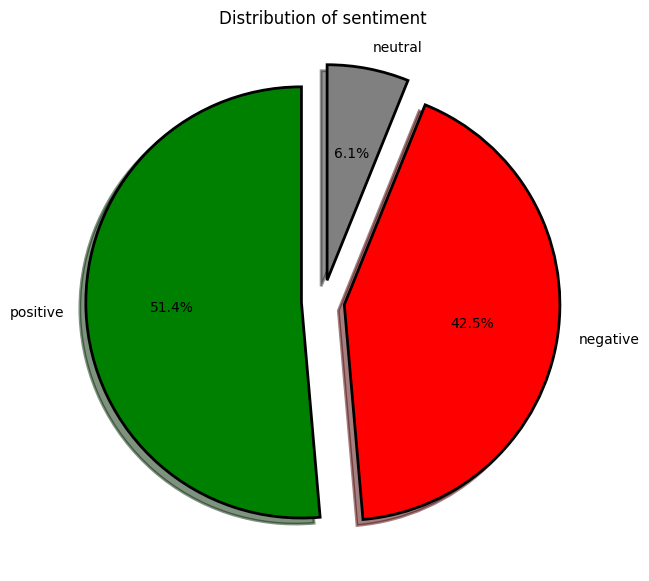

In [ ]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'red', 'grey')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=df_fix['polarity'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of sentiment')

penjelasan:

diketahui dengan menggunakan dictionary github diperoleh baqah sentimen negative ulasan aplikasi dana sebesar 42.5%, ulasan positif sebesar 51.4%, dan  ulasan neutral sebesar 6.1%

## B.4 Visualisasi

### B.4.1 Wordcloud and distribusi word Positive

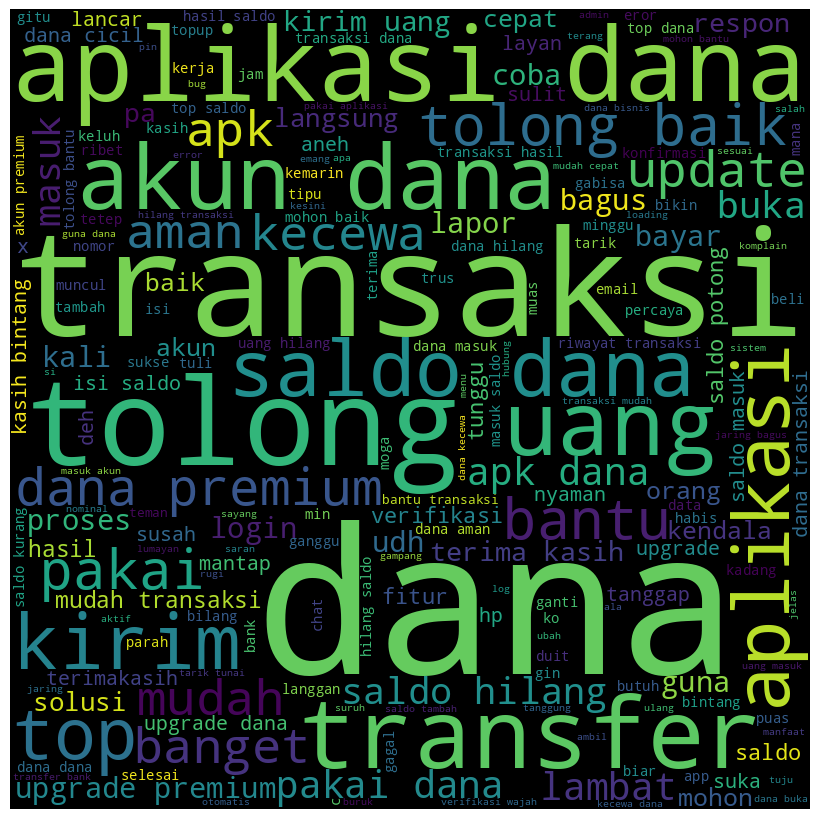

In [ ]:
text1 = " ".join(df_fix[df_fix['polarity'] == 'positive']['text_akhir'])
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(text1)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

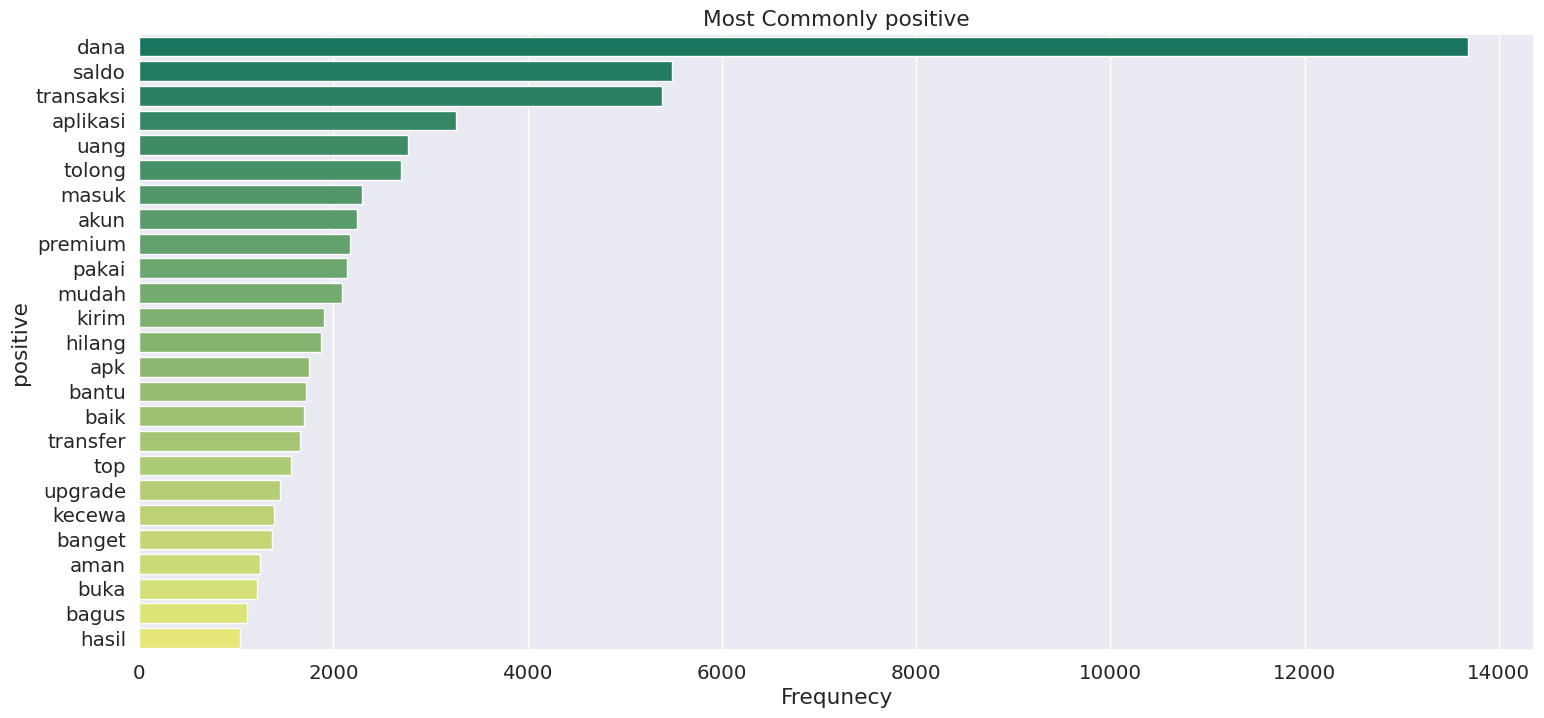

In [ ]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words = []
for sentence in df_fix[df_fix['sentiment'] == 1]['text_akhir'].to_list():
    for word in sentence.split():
        all_words.append(word)

df1 = pd.DataFrame(Counter(all_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df1['Word'], x= df1['Frequency'], palette= 'summer')
plt.title("Most Commonly positive")
plt.xlabel("Frequnecy")
plt.ylabel("positive")
plt.show()

penjelasan:

dari wordcloud diperoleh bahwa kata bantu, bagus, cepat, uang, saldo, aman, kirim, baik, guna, mantab merupakan kata yang banyak digunakan dalam ulasan berlabel sentimen positive

### B.4.2 Wordcloud and distribusi word negative

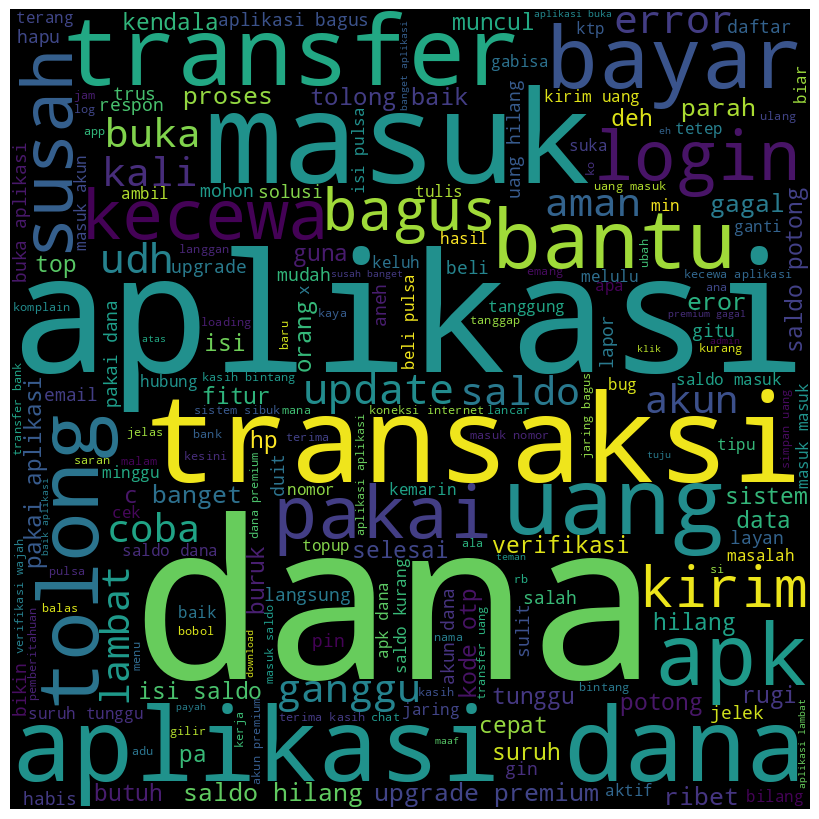

In [ ]:
text3 = " ".join(df_fix[df_fix['polarity'] == 'negative']['text_akhir'])
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(text3)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

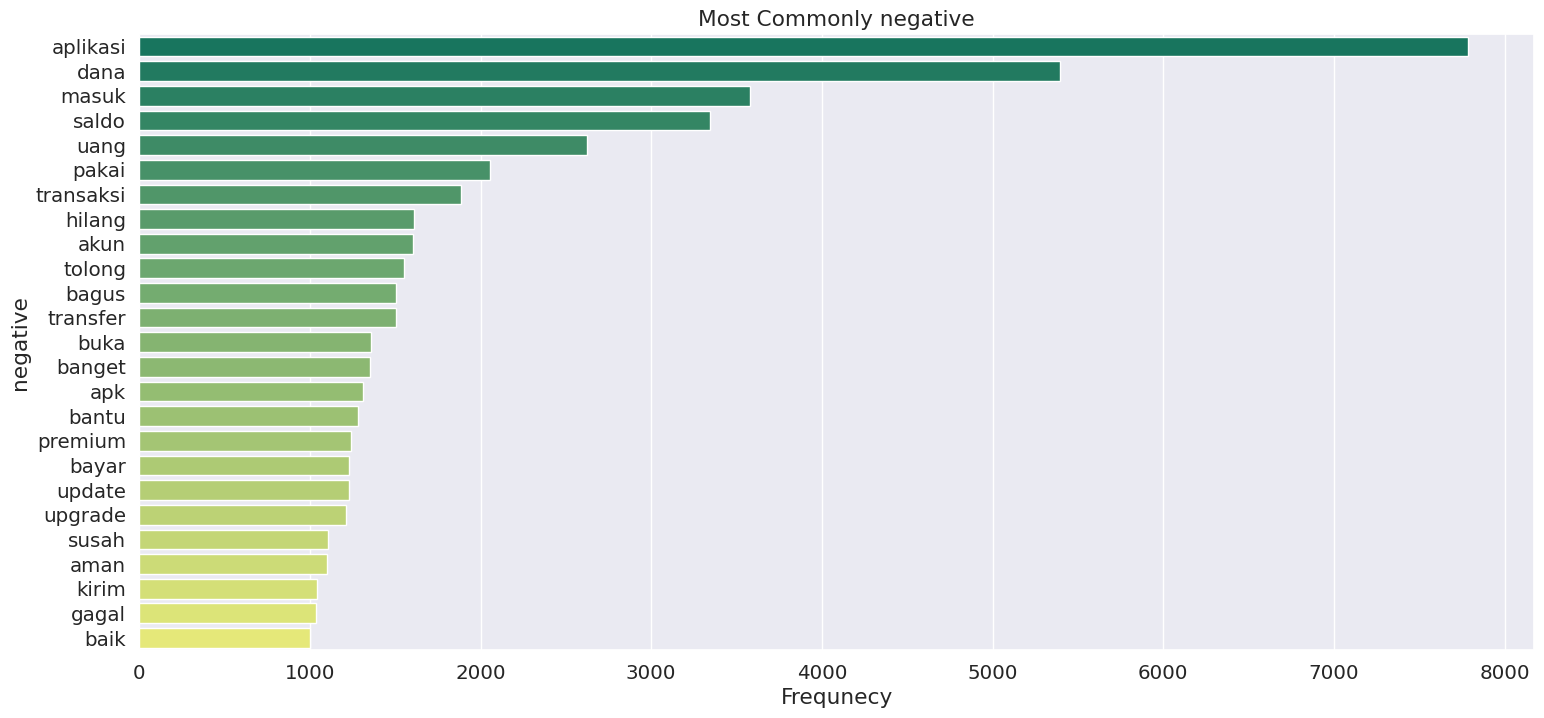

In [ ]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words2 = []
for sentence in df_fix[df_fix['sentiment'] == -1]['text_akhir'].to_list():
    for word in sentence.split():
        all_words2.append(word)

df2 = pd.DataFrame(Counter(all_words2).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df2['Word'], x= df2['Frequency'], palette= 'summer')
plt.title("Most Commonly negative")
plt.xlabel("Frequnecy")
plt.ylabel("negative")
plt.show()

penjelasan:

dari wordcloud diperoleh bahwa kata hilang, bagus, upgrade, susah, premium, tolong merupakan kata yang banyak digunakan dalam ulasan berlabel sentimen negative

### B.4.3 Wordcloud and distribusi word Neutral

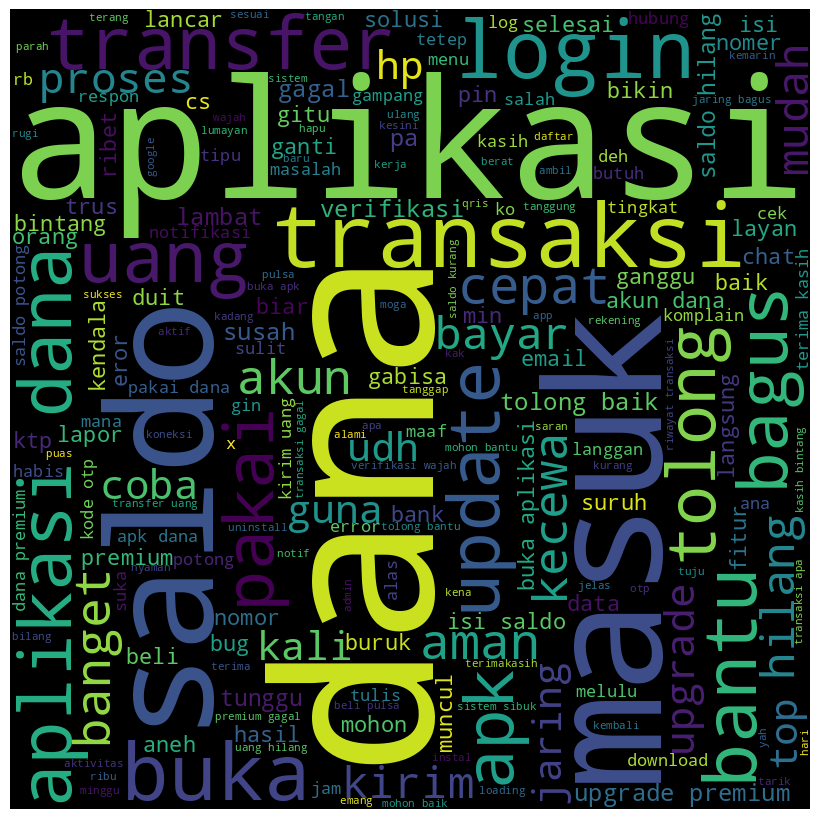

In [ ]:
text5 = " ".join(df_fix[df_fix['polarity'] == 'neutral']['text_akhir'])
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(text5)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Text(0, 0.5, 'neutral')

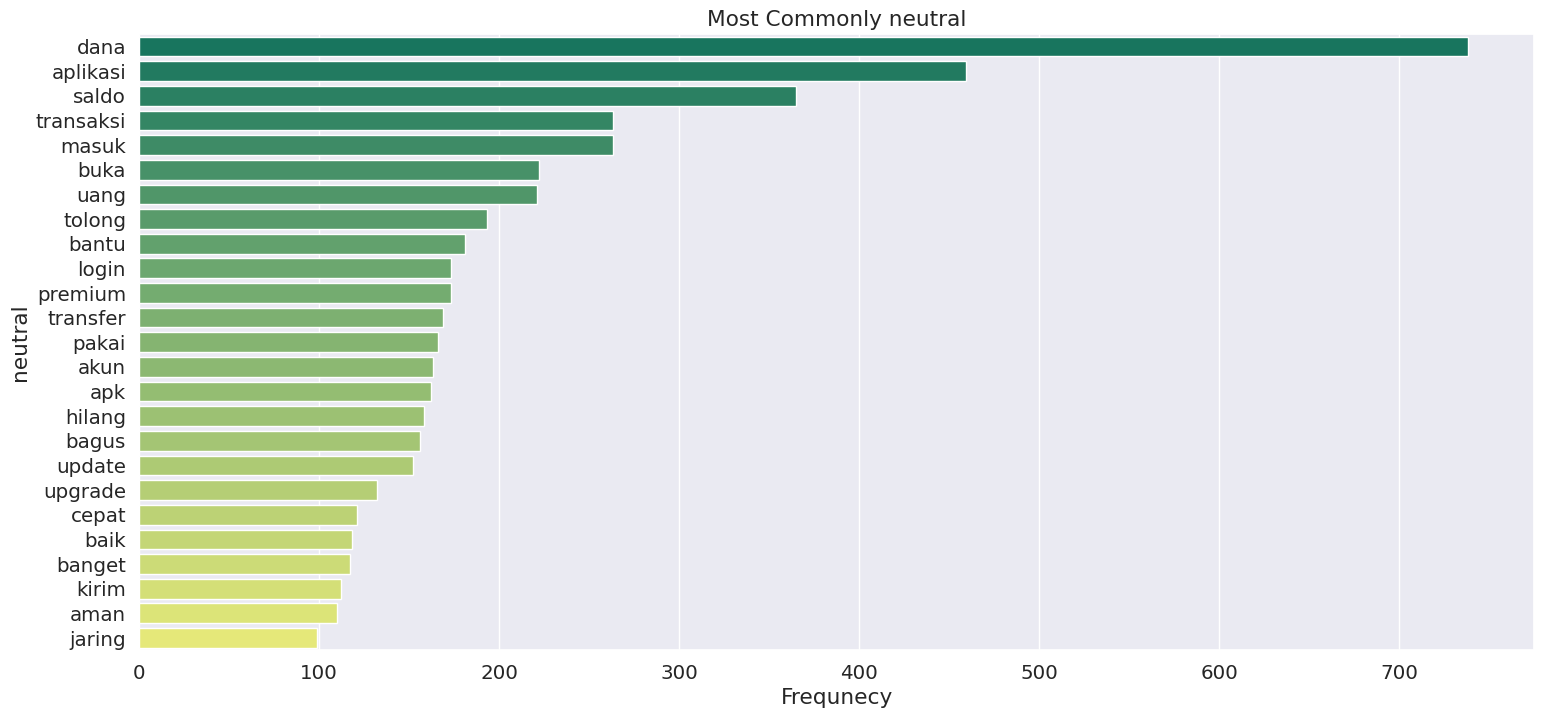

In [ ]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words3 = []
for sentence in df_fix[df_fix['sentiment'] == 0]['text_akhir'].to_list():
    for word in sentence.split():
        all_words3.append(word)

df3 = pd.DataFrame(Counter(all_words3).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df3['Word'], x= df3['Frequency'], palette= 'summer')
plt.title("Most Commonly neutral")
plt.xlabel("Frequnecy")
plt.ylabel("neutral")

penjelasan:

dari wordcloud diperoleh bahwa kata update, bantu, premium, kirim, transfer, login merupakan kata yang banyak digunakan dalam ulasan sentimen neutral

### B.4.4 Wordcloud and distribusi word positive, neutral, and negative

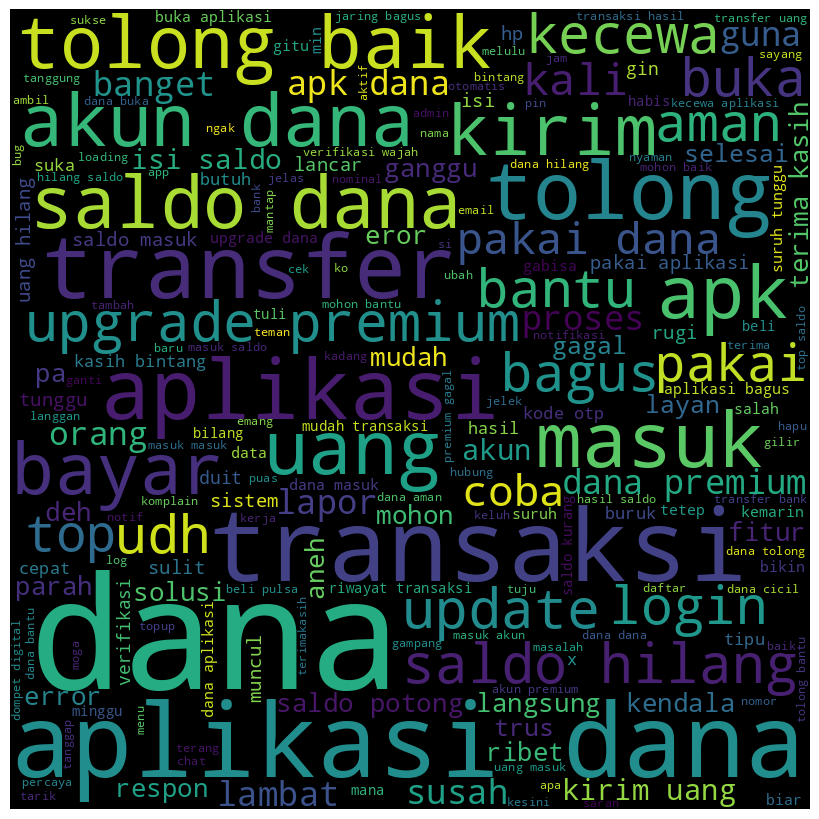

In [ ]:
out = ' '.join([word for word in df_fix['text_akhir']])
# create wordcloud
wordcloud = WordCloud(width = 800, height = 800,
 background_color ='black',
 min_font_size = 10).generate(out)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

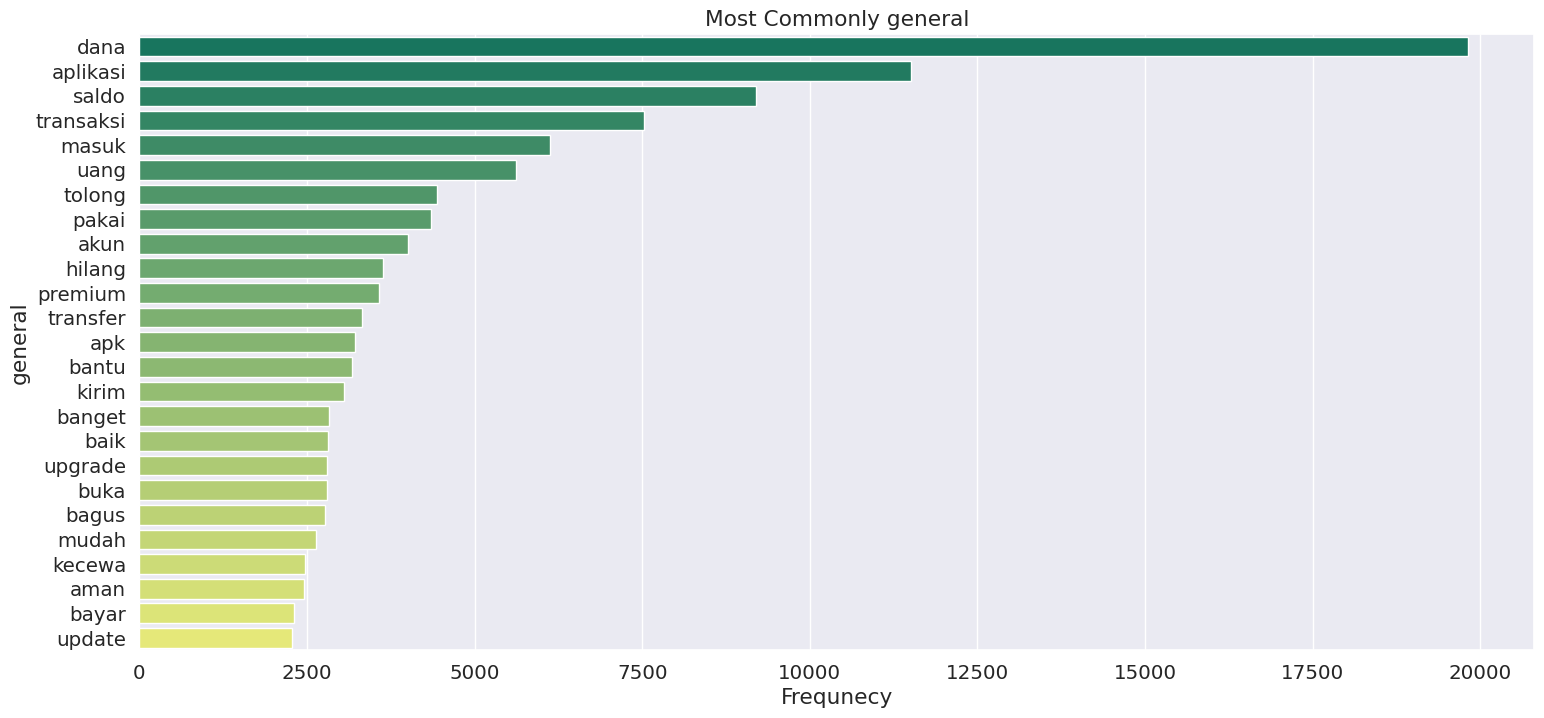

In [ ]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')
all_words4 = []
for sentence in df_fix['text_akhir'].to_list():
    for word in sentence.split():
        all_words4.append(word)

df4 = pd.DataFrame(Counter(all_words4).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df4['Word'], x= df4['Frequency'], palette= 'summer')
plt.title("Most Commonly general")
plt.xlabel("Frequnecy")
plt.ylabel("general")
plt.show()

penjelasan:

dari wordcloud diperoleh bahwa kata transaksi, masuk, tolong, uang, premium, akun, saldo merupakan kata yang banyak digunakan dalam ulasan

# C. Pemodelan

In [2]:
from collections import Counter
import warnings
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, confusion_matrix,precision_recall_curve, auc, roc_curve, classification_report

In [20]:
# membuat dataframe untuk menyimpan hasil evaluasi
stem_model_eval_tts_train = pd.DataFrame(columns=['Accuracy'])
stem_model_eval_tts_test = pd.DataFrame(columns=['Accuracy'])

In [204]:
#untuk hyperparameter tuning
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


## C.1 Ekstrasi Fitur Tfidf dan Handling Imbalanced data

In [148]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = df_fix['text_akhir']
y = df_fix['sentiment']
##y_rat = clean_df['sentiment_rating']

# Ekstraksi fitur dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df.head()

admin  aktif  akun  alami  alas  aman  ambil       ana  aneh       apa  \
0    0.0    0.0   0.0    0.0   0.0   0.0    0.0  0.000000   0.0  0.000000   
1    0.0    0.0   0.0    0.0   0.0   0.0    0.0  0.000000   0.0  0.000000   
2    0.0    0.0   0.0    0.0   0.0   0.0    0.0  0.285574   0.0  0.000000   
3    0.0    0.0   0.0    0.0   0.0   0.0    0.0  0.000000   0.0  0.258451   
4    0.0    0.0   0.0    0.0   0.0   0.0    0.0  0.000000   0.0  0.000000   

   ...    tunggu      uang  udh     ulang  update   upgrade  verifikasi  via  \
0  ...  0.000000  0.000000  0.0  0.000000     0.0  0.000000    0.433958  0.0   
1  ...  0.000000  0.000000  0.0  0.000000     0.0  0.188353    0.216022  0.0   
2  ...  0.255076  0.000000  0.0  0.303584     0.0  0.000000    0.000000  0.0   
3  ...  0.000000  0.153081  0.0  0.000000     0.0  0.000000    0.000000  0.0   
4  ...  0.000000  0.000000  0.0  0.000000     0.0  0.000000    0.000000  0.0   

     wajah  wifi  
0  0.49125   0.0  
1  0.00000   0.0  
2  0.00000   0.0  
3  0.00000   0.0  
4  0.00000   0.0  

[5 rows x 200 columns]

In [68]:
# Handling imbalanced using SMOTE
from imblearn.over_sampling import SMOTE # Handling Imbalanced
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_tfidf,y)

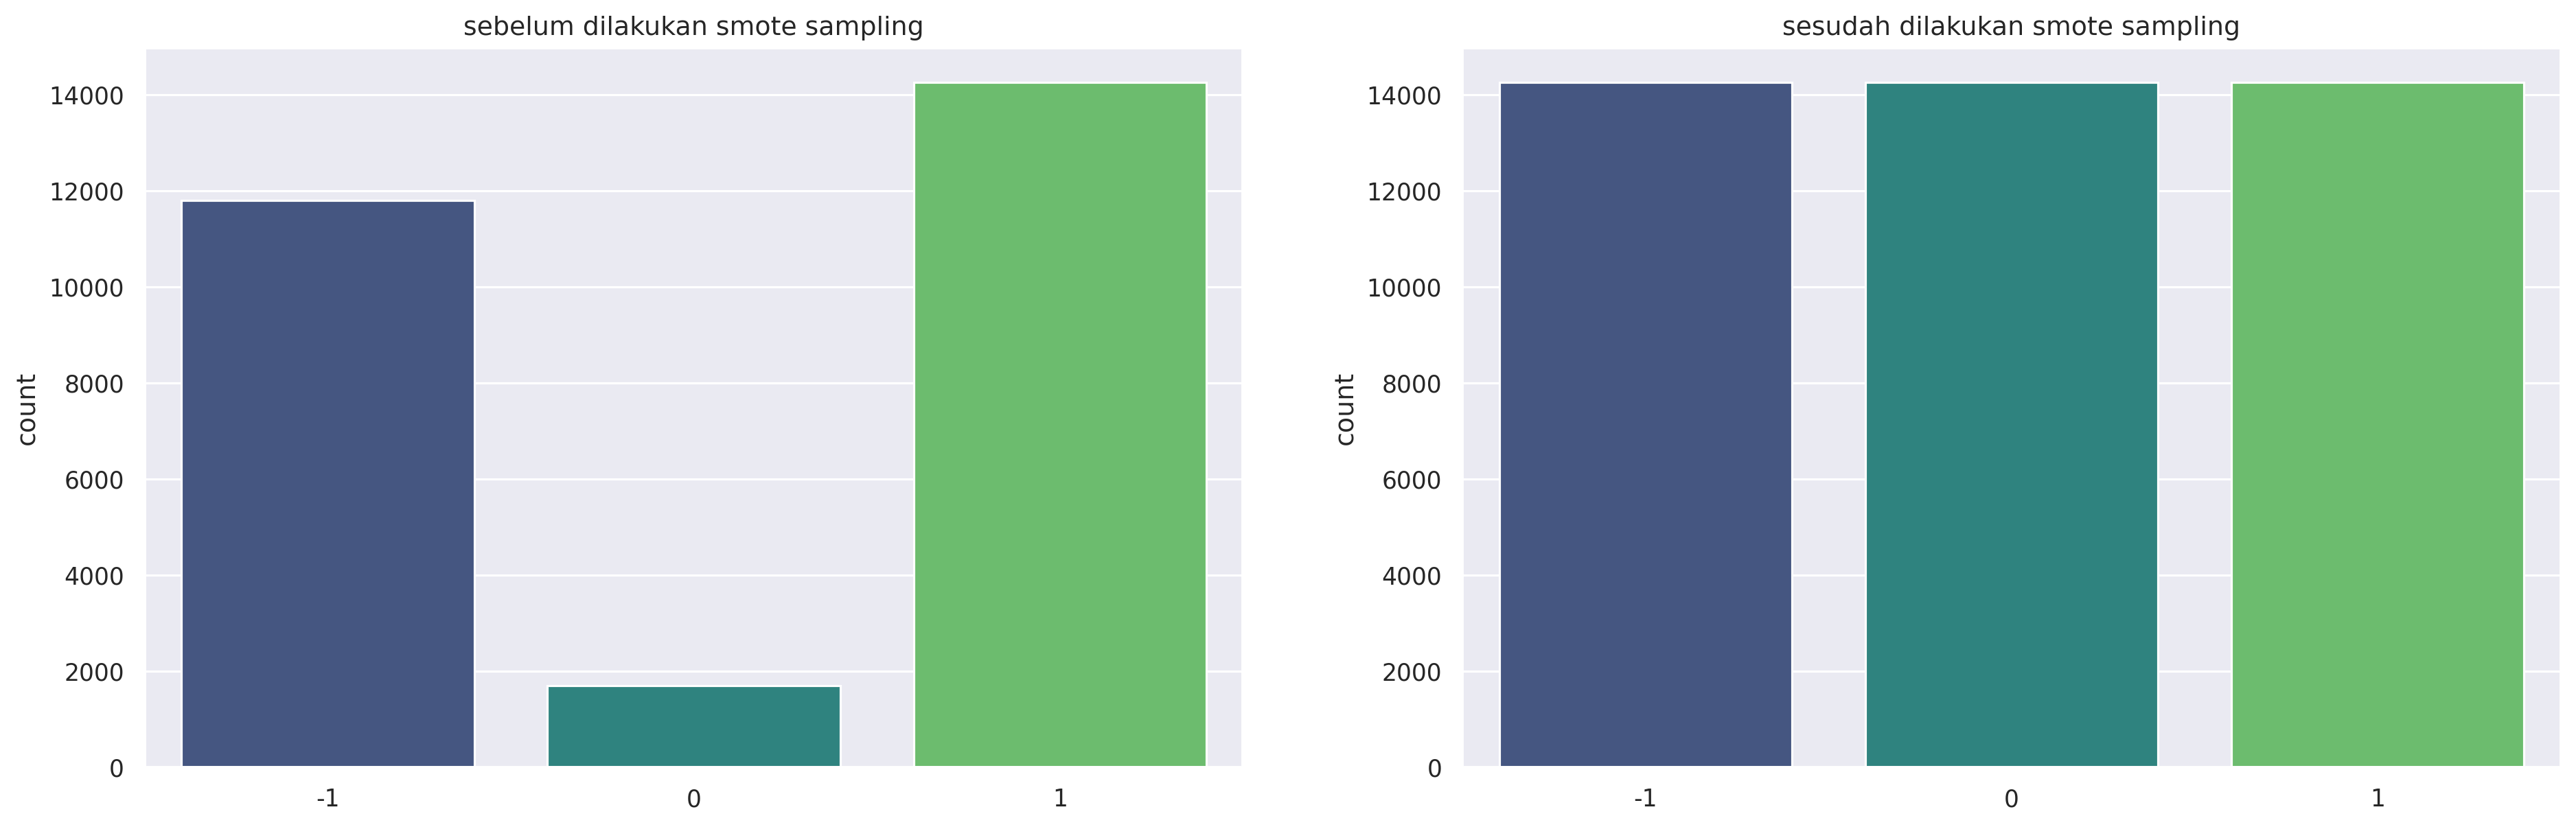

In [ ]:
#visualisasi data
import numpy as np
import seaborn as sns
sns.set()
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
sizes = [747, 4825]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.title("sebelum dilakukan smote sampling")
sns.barplot(x = df_fix['sentiment'].unique(), y = df_fix['sentiment'].value_counts(), palette= 'viridis')


plt.subplot(1, 2, 2)
plt.title("sesudah dilakukan smote sampling")
sns.barplot(x = y_sm.unique(), y = y_sm.value_counts(), palette= 'viridis')

plt.show()

penjelasan:

diatas merupakan data sebelumnya terjadi imbalanced data pada data neutral dilambangkan (0) dan negative ulasan dilambangkan (0) terhadap data positive ulasan dilambangkan (1) maka dilakukan smote untuk imbalanced data agar menghasilkan prediksi lebih  baik.

Mengatasi Imbalanced data menggunak teknik smote dimana mensintesis kelas minoritas agar sama dengan jumlah data kelas mayoritas

## C.2 SVM

### C.2.1 SVM dengan train 80%

In [69]:
#We separate our data is train and test
X_train, X_test, Y_train, Y_test = train_test_split(
    x_sm,y_sm, test_size = 0.2, random_state = 1)

In [70]:
from sklearn.svm import SVC
svc = SVC(C= 3.811381411635508,kernel='rbf')
svc.fit(X_train.toarray(), Y_train)

Y_pred_svc = svc.predict(X_test.toarray())
Y_pred_tr_svc = svc.predict(X_train.toarray())

In [71]:
#Train
accuracy_tr_svc = round(accuracy_score(Y_train, Y_pred_tr_svc)*100,1)
#Test
accuracy_svc = round(accuracy_score(Y_test, Y_pred_svc)*100,1)

In [210]:
print("hasil akurasi Train SVM: ", round(accuracy_tr_svc,1)," %")
print("hasil akurasi Test SVM: ", round(accuracy_svc,1),"%")

hasil akurasi Train SVM:  98.5  %
hasil akurasi Test SVM:  92.0 %


In [212]:
#Save Evaluation
stem_model_eval_tts_train.loc['SVM Train 80%'] = [accuracy_tr_svc]
stem_model_eval_tts_test.loc['SVM Test 20%'] = [accuracy_svc]

### C.2.2 SVM dengan train 70%

In [74]:
#from sklearn.datasets import make_classification
X_train_30, X_test_30, Y_train_30, Y_test_30 = train_test_split(
    x_sm,y_sm, test_size = 0.3, random_state = 2)

In [75]:
from sklearn.svm import SVC
svc_30 = SVC(C=2.4307461020095835,kernel='rbf',gamma=2.236160418945324)
svc_30.fit(X_train_30.toarray(), Y_train_30)

Y_pred_svc_30 = svc_30.predict(X_test_30.toarray())
Y_pred_tr_svc_30 = svc_30.predict(X_train_30.toarray())

In [76]:
#Train
accuracy_tr_svc_30 = round(accuracy_score(Y_train_30, Y_pred_tr_svc_30)*100,1)
#Test
accuracy_svc_30 = round(accuracy_score(Y_test_30, Y_pred_svc_30)*100,1)

In [77]:
print("hasil akurasi Train SVM: ", accuracy_tr_svc_30,"%")
print("hasil akurasi Test SVM: ", accuracy_svc_30,"%")

hasil akurasi Train SVM:  98.9 %
hasil akurasi Test SVM:  90.5 %


In [78]:
#Save Evaluation
stem_model_eval_tts_train.loc['SVM Train 70%'] = [accuracy_tr_svc_30]
stem_model_eval_tts_test.loc['SVM Test 30%'] = [accuracy_svc_30]

## C.3 Catboost

In [203]:
!pip install catboost

### C.3.1 Catboost dengan train 80%

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.27),
        'depth': trial.suggest_int('depth', 3, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Create the cat classifier with the suggested hyperparameters
    cat = CatBoostClassifier(**params)

    # Train the classifier and evaluate on the validation set
    cat.fit(X_train.toarray(), Y_train)
    accuracy = cat.score(X_test.toarray(), Y_test)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,timeout=600*12)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)


[I 2024-08-08 11:47:29,083] A new study created in memory with name: no-name-610c69e5-ee6a-4ced-93a0-6b40099ce5bc


0:	learn: 1.0468103	total: 2.15s	remaining: 31m 2s
1:	learn: 1.0166571	total: 4.13s	remaining: 29m 49s
2:	learn: 1.0099241	total: 6.09s	remaining: 29m 16s
3:	learn: 0.9796970	total: 8.07s	remaining: 29m 2s
4:	learn: 0.9662814	total: 11.3s	remaining: 32m 27s
5:	learn: 0.9544975	total: 13.5s	remaining: 32m 21s
6:	learn: 0.9475588	total: 15.4s	remaining: 31m 29s
7:	learn: 0.9356269	total: 17.2s	remaining: 30m 50s
8:	learn: 0.9273885	total: 19.1s	remaining: 30m 19s
9:	learn: 0.9155864	total: 20.9s	remaining: 29m 56s
10:	learn: 0.9051787	total: 23.3s	remaining: 30m 18s
11:	learn: 0.8983543	total: 26.2s	remaining: 31m 9s
12:	learn: 0.8914129	total: 28.1s	remaining: 30m 46s
13:	learn: 0.8870003	total: 29.9s	remaining: 30m 26s
14:	learn: 0.8796510	total: 31.8s	remaining: 30m 11s
15:	learn: 0.8717244	total: 33.7s	remaining: 29m 55s
16:	learn: 0.8667120	total: 35.6s	remaining: 29m 41s
17:	learn: 0.8605854	total: 38.6s	remaining: 30m 22s
18:	learn: 0.8521416	total: 40.6s	remaining: 30m 14s
19:	le

[I 2024-08-08 12:17:44,461] Trial 0 finished with value: 0.8868202764976959 and parameters: {'iterations': 868, 'learning_rate': 0.2236513459562878, 'depth': 10, 'random_strength': 8}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0874351	total: 986ms	remaining: 4m 23s
1:	learn: 1.0765112	total: 1.99s	remaining: 4m 25s
2:	learn: 1.0673612	total: 2.99s	remaining: 4m 24s
3:	learn: 1.0576169	total: 3.98s	remaining: 4m 22s
4:	learn: 1.0497912	total: 5s	remaining: 4m 22s
5:	learn: 1.0432623	total: 6s	remaining: 4m 22s
6:	learn: 1.0354496	total: 7.03s	remaining: 4m 22s
7:	learn: 1.0285909	total: 8.73s	remaining: 4m 43s
8:	learn: 1.0239343	total: 10.5s	remaining: 5m 3s
9:	learn: 1.0190601	total: 11.6s	remaining: 5m
10:	learn: 1.0124042	total: 12.6s	remaining: 4m 54s
11:	learn: 1.0055613	total: 13.6s	remaining: 4m 50s
12:	learn: 1.0000051	total: 14.6s	remaining: 4m 46s
13:	learn: 0.9941913	total: 15.6s	remaining: 4m 43s
14:	learn: 0.9913596	total: 16.6s	remaining: 4m 40s
15:	learn: 0.9864708	total: 17.6s	remaining: 4m 37s
16:	learn: 0.9834811	total: 18.6s	remaining: 4m 34s
17:	learn: 0.9794286	total: 19.6s	remaining: 4m 32s
18:	learn: 0.9764269	total: 20.6s	remaining: 4m 29s
19:	learn: 0.9729960	total: 22.1s

[I 2024-08-08 12:22:51,691] Trial 1 finished with value: 0.736036866359447 and parameters: {'iterations': 268, 'learning_rate': 0.0429962480036365, 'depth': 9, 'random_strength': 4}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0535184	total: 543ms	remaining: 7m 42s
1:	learn: 1.0196925	total: 819ms	remaining: 5m 48s
2:	learn: 0.9943110	total: 1.11s	remaining: 5m 15s
3:	learn: 0.9761380	total: 1.39s	remaining: 4m 55s
4:	learn: 0.9601911	total: 1.66s	remaining: 4m 41s
5:	learn: 0.9489346	total: 1.94s	remaining: 4m 34s
6:	learn: 0.9330984	total: 2.24s	remaining: 4m 30s
7:	learn: 0.9238303	total: 2.5s	remaining: 4m 24s
8:	learn: 0.9142251	total: 2.78s	remaining: 4m 20s
9:	learn: 0.9031060	total: 3.06s	remaining: 4m 17s
10:	learn: 0.8957145	total: 3.34s	remaining: 4m 15s
11:	learn: 0.8877548	total: 3.61s	remaining: 4m 13s
12:	learn: 0.8781845	total: 3.9s	remaining: 4m 11s
13:	learn: 0.8712399	total: 4.19s	remaining: 4m 11s
14:	learn: 0.8640738	total: 4.46s	remaining: 4m 9s
15:	learn: 0.8568129	total: 4.74s	remaining: 4m 7s
16:	learn: 0.8502928	total: 5.02s	remaining: 4m 6s
17:	learn: 0.8429979	total: 5.45s	remaining: 4m 12s
18:	learn: 0.8361018	total: 5.97s	remaining: 4m 21s
19:	learn: 0.8311653	total:

[I 2024-08-08 12:27:15,142] Trial 2 finished with value: 0.8663594470046083 and parameters: {'iterations': 852, 'learning_rate': 0.16007450508752824, 'depth': 7, 'random_strength': 1}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0735752	total: 63.4ms	remaining: 47.5s
1:	learn: 1.0611167	total: 110ms	remaining: 41.1s
2:	learn: 1.0349183	total: 162ms	remaining: 40.4s
3:	learn: 1.0072626	total: 213ms	remaining: 39.8s
4:	learn: 0.9995994	total: 261ms	remaining: 38.9s
5:	learn: 0.9924232	total: 324ms	remaining: 40.2s
6:	learn: 0.9832703	total: 368ms	remaining: 39s
7:	learn: 0.9758153	total: 411ms	remaining: 38.1s
8:	learn: 0.9713890	total: 460ms	remaining: 37.8s
9:	learn: 0.9684049	total: 507ms	remaining: 37.5s
10:	learn: 0.9584818	total: 559ms	remaining: 37.6s
11:	learn: 0.9544812	total: 604ms	remaining: 37.1s
12:	learn: 0.9493116	total: 648ms	remaining: 36.8s
13:	learn: 0.9442623	total: 692ms	remaining: 36.4s
14:	learn: 0.9412376	total: 738ms	remaining: 36.2s
15:	learn: 0.9359890	total: 787ms	remaining: 36.1s
16:	learn: 0.9331230	total: 831ms	remaining: 35.8s
17:	learn: 0.9294032	total: 875ms	remaining: 35.6s
18:	learn: 0.9281180	total: 918ms	remaining: 35.3s
19:	learn: 0.9260128	total: 962ms	remainin

[I 2024-08-08 12:28:00,517] Trial 3 finished with value: 0.8298617511520737 and parameters: {'iterations': 750, 'learning_rate': 0.2226199229361466, 'depth': 3, 'random_strength': 5}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0721627	total: 305ms	remaining: 3m 58s
1:	learn: 1.0474826	total: 470ms	remaining: 3m 3s
2:	learn: 1.0208380	total: 631ms	remaining: 2m 44s
3:	learn: 1.0001360	total: 792ms	remaining: 2m 34s
4:	learn: 0.9897410	total: 944ms	remaining: 2m 27s
5:	learn: 0.9784939	total: 1.1s	remaining: 2m 22s
6:	learn: 0.9697933	total: 1.26s	remaining: 2m 19s
7:	learn: 0.9605681	total: 1.43s	remaining: 2m 18s
8:	learn: 0.9546540	total: 1.58s	remaining: 2m 16s
9:	learn: 0.9464138	total: 1.74s	remaining: 2m 14s
10:	learn: 0.9399249	total: 1.9s	remaining: 2m 13s
11:	learn: 0.9318435	total: 2.06s	remaining: 2m 12s
12:	learn: 0.9254352	total: 2.21s	remaining: 2m 11s
13:	learn: 0.9212401	total: 2.36s	remaining: 2m 9s
14:	learn: 0.9153163	total: 2.54s	remaining: 2m 10s
15:	learn: 0.9092807	total: 2.7s	remaining: 2m 9s
16:	learn: 0.9039091	total: 2.86s	remaining: 2m 9s
17:	learn: 0.8983424	total: 3.01s	remaining: 2m 8s
18:	learn: 0.8940971	total: 3.17s	remaining: 2m 7s
19:	learn: 0.8887509	total: 3.3

[I 2024-08-08 12:30:21,537] Trial 4 finished with value: 0.8634101382488479 and parameters: {'iterations': 784, 'learning_rate': 0.1954537126547319, 'depth': 6, 'random_strength': 7}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0910029	total: 996ms	remaining: 5m 55s
1:	learn: 1.0836433	total: 2.03s	remaining: 6m 1s
2:	learn: 1.0790267	total: 2.93s	remaining: 5m 47s
3:	learn: 1.0729078	total: 3.5s	remaining: 5m 9s
4:	learn: 1.0663309	total: 4.06s	remaining: 4m 46s
5:	learn: 1.0588087	total: 4.63s	remaining: 4m 31s
6:	learn: 1.0513344	total: 5.18s	remaining: 4m 19s
7:	learn: 1.0429414	total: 5.74s	remaining: 4m 11s
8:	learn: 1.0397180	total: 6.28s	remaining: 4m 3s
9:	learn: 1.0328805	total: 6.85s	remaining: 3m 58s
10:	learn: 1.0273742	total: 7.42s	remaining: 3m 54s
11:	learn: 1.0236958	total: 7.98s	remaining: 3m 50s
12:	learn: 1.0179762	total: 8.55s	remaining: 3m 46s
13:	learn: 1.0117893	total: 9.1s	remaining: 3m 43s
14:	learn: 1.0049283	total: 9.66s	remaining: 3m 40s
15:	learn: 1.0020584	total: 10.2s	remaining: 3m 38s
16:	learn: 0.9985928	total: 10.8s	remaining: 3m 36s
17:	learn: 0.9959122	total: 11.3s	remaining: 3m 33s
18:	learn: 0.9918057	total: 11.9s	remaining: 3m 32s
19:	learn: 0.9878423	total:

[I 2024-08-08 12:34:14,406] Trial 5 finished with value: 0.7699539170506913 and parameters: {'iterations': 358, 'learning_rate': 0.04943951685926852, 'depth': 8, 'random_strength': 8}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0647379	total: 581ms	remaining: 5m 38s
1:	learn: 1.0321774	total: 1.15s	remaining: 5m 35s
2:	learn: 1.0119376	total: 1.69s	remaining: 5m 27s
3:	learn: 1.0023502	total: 2.26s	remaining: 5m 28s
4:	learn: 0.9898059	total: 2.8s	remaining: 5m 24s
5:	learn: 0.9721157	total: 3.71s	remaining: 5m 57s
6:	learn: 0.9535198	total: 4.68s	remaining: 6m 26s
7:	learn: 0.9461962	total: 5.7s	remaining: 6m 50s
8:	learn: 0.9421219	total: 6.72s	remaining: 7m 9s
9:	learn: 0.9320891	total: 7.33s	remaining: 7m
10:	learn: 0.9228399	total: 7.9s	remaining: 6m 51s
11:	learn: 0.9178301	total: 8.45s	remaining: 6m 42s
12:	learn: 0.9070127	total: 9.01s	remaining: 6m 35s
13:	learn: 0.8936222	total: 9.59s	remaining: 6m 30s
14:	learn: 0.8912759	total: 10.1s	remaining: 6m 24s
15:	learn: 0.8843438	total: 10.7s	remaining: 6m 19s
16:	learn: 0.8790366	total: 11.3s	remaining: 6m 15s
17:	learn: 0.8739811	total: 11.8s	remaining: 6m 11s
18:	learn: 0.8673049	total: 12.4s	remaining: 6m 7s
19:	learn: 0.8606583	total: 12.

[I 2024-08-08 12:40:34,163] Trial 6 finished with value: 0.8705990783410138 and parameters: {'iterations': 584, 'learning_rate': 0.2441749699497063, 'depth': 8, 'random_strength': 9}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0790896	total: 333ms	remaining: 4m 4s
1:	learn: 1.0695174	total: 522ms	remaining: 3m 11s
2:	learn: 1.0465723	total: 722ms	remaining: 2m 56s
3:	learn: 1.0281324	total: 901ms	remaining: 2m 45s
4:	learn: 1.0218494	total: 1.09s	remaining: 2m 39s
5:	learn: 1.0076966	total: 1.27s	remaining: 2m 34s
6:	learn: 0.9957752	total: 1.46s	remaining: 2m 31s
7:	learn: 0.9911922	total: 1.63s	remaining: 2m 28s
8:	learn: 0.9826312	total: 1.82s	remaining: 2m 26s
9:	learn: 0.9768620	total: 2s	remaining: 2m 25s
10:	learn: 0.9718987	total: 2.18s	remaining: 2m 23s
11:	learn: 0.9659872	total: 2.37s	remaining: 2m 23s
12:	learn: 0.9618413	total: 2.55s	remaining: 2m 21s
13:	learn: 0.9579056	total: 2.73s	remaining: 2m 21s
14:	learn: 0.9522449	total: 2.91s	remaining: 2m 20s
15:	learn: 0.9483901	total: 3.1s	remaining: 2m 19s
16:	learn: 0.9433344	total: 3.3s	remaining: 2m 19s
17:	learn: 0.9409471	total: 3.49s	remaining: 2m 19s
18:	learn: 0.9371046	total: 3.68s	remaining: 2m 19s
19:	learn: 0.9338549	total: 

[I 2024-08-08 12:41:58,242] Trial 7 finished with value: 0.8433179723502304 and parameters: {'iterations': 737, 'learning_rate': 0.13990962367957538, 'depth': 5, 'random_strength': 6}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0905960	total: 160ms	remaining: 54.2s
1:	learn: 1.0774328	total: 290ms	remaining: 49s
2:	learn: 1.0651950	total: 436ms	remaining: 49s
3:	learn: 1.0548443	total: 570ms	remaining: 47.9s
4:	learn: 1.0468137	total: 711ms	remaining: 47.7s
5:	learn: 1.0439198	total: 829ms	remaining: 46.1s
6:	learn: 1.0401610	total: 956ms	remaining: 45.5s
7:	learn: 1.0337795	total: 1.09s	remaining: 45.5s
8:	learn: 1.0273505	total: 1.22s	remaining: 44.9s
9:	learn: 1.0241277	total: 1.34s	remaining: 44.3s
10:	learn: 1.0190231	total: 1.48s	remaining: 44.2s
11:	learn: 1.0159002	total: 1.6s	remaining: 43.9s
12:	learn: 1.0110784	total: 1.75s	remaining: 44s
13:	learn: 1.0047978	total: 1.88s	remaining: 43.9s
14:	learn: 1.0005396	total: 1.99s	remaining: 43.2s
15:	learn: 0.9979431	total: 2.07s	remaining: 42s
16:	learn: 0.9946978	total: 2.14s	remaining: 40.7s
17:	learn: 0.9910666	total: 2.22s	remaining: 39.6s
18:	learn: 0.9878599	total: 2.28s	remaining: 38.5s
19:	learn: 0.9845294	total: 2.35s	remaining: 37.6s

[I 2024-08-08 12:42:26,321] Trial 8 finished with value: 0.719815668202765 and parameters: {'iterations': 340, 'learning_rate': 0.05632365373747345, 'depth': 4, 'random_strength': 4}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0961343	total: 110ms	remaining: 48.4s
1:	learn: 1.0944545	total: 212ms	remaining: 46.6s
2:	learn: 1.0907906	total: 297ms	remaining: 43.5s
3:	learn: 1.0862323	total: 355ms	remaining: 38.9s
4:	learn: 1.0829843	total: 409ms	remaining: 35.8s
5:	learn: 1.0813751	total: 459ms	remaining: 33.3s
6:	learn: 1.0788190	total: 507ms	remaining: 31.5s
7:	learn: 1.0764413	total: 554ms	remaining: 30.1s
8:	learn: 1.0752664	total: 608ms	remaining: 29.2s
9:	learn: 1.0739445	total: 655ms	remaining: 28.3s
10:	learn: 1.0710219	total: 707ms	remaining: 27.7s
11:	learn: 1.0679820	total: 759ms	remaining: 27.2s
12:	learn: 1.0652729	total: 817ms	remaining: 27s
13:	learn: 1.0637696	total: 866ms	remaining: 26.5s
14:	learn: 1.0625709	total: 913ms	remaining: 26s
15:	learn: 1.0599978	total: 967ms	remaining: 25.7s
16:	learn: 1.0576907	total: 1.01s	remaining: 25.4s
17:	learn: 1.0565500	total: 1.07s	remaining: 25.2s
18:	learn: 1.0555193	total: 1.11s	remaining: 24.8s
19:	learn: 1.0531139	total: 1.17s	remaining: 

[I 2024-08-08 12:42:53,531] Trial 9 finished with value: 0.6352073732718894 and parameters: {'iterations': 442, 'learning_rate': 0.0197503358442293, 'depth': 3, 'random_strength': 6}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0378939	total: 1.99s	remaining: 31m 56s
1:	learn: 1.0072787	total: 3.87s	remaining: 31m
2:	learn: 1.0012435	total: 5.76s	remaining: 30m 44s
3:	learn: 0.9783883	total: 7.66s	remaining: 30m 37s
4:	learn: 0.9643591	total: 9.57s	remaining: 30m 33s
5:	learn: 0.9460779	total: 12.2s	remaining: 32m 33s
6:	learn: 0.9387684	total: 15s	remaining: 34m 5s
7:	learn: 0.9253930	total: 16.9s	remaining: 33m 35s
8:	learn: 0.9213886	total: 18.8s	remaining: 33m 8s
9:	learn: 0.9118050	total: 20.7s	remaining: 32m 49s
10:	learn: 0.9009978	total: 22.6s	remaining: 32m 34s
11:	learn: 0.8932423	total: 24.6s	remaining: 32m 33s
12:	learn: 0.8854787	total: 27.9s	remaining: 33m 57s
13:	learn: 0.8796145	total: 29.9s	remaining: 33m 44s
14:	learn: 0.8706394	total: 31.7s	remaining: 33m 26s
15:	learn: 0.8587519	total: 33.6s	remaining: 33m 9s
16:	learn: 0.8534595	total: 35.5s	remaining: 32m 55s
17:	learn: 0.8461527	total: 37.4s	remaining: 32m 42s
18:	learn: 0.8395034	total: 40.1s	remaining: 33m 13s
19:	learn: 0

[I 2024-08-08 13:17:18,334] Trial 10 finished with value: 0.8836866359447004 and parameters: {'iterations': 963, 'learning_rate': 0.26916808274559045, 'depth': 10, 'random_strength': 10}. Best is trial 0 with value: 0.8868202764976959.


0:	learn: 1.0380996	total: 1.9s	remaining: 31m 14s
1:	learn: 1.0075317	total: 3.81s	remaining: 31m 16s
2:	learn: 0.9998695	total: 5.74s	remaining: 31m 19s
3:	learn: 0.9775964	total: 8.58s	remaining: 35m 5s
4:	learn: 0.9636737	total: 11.3s	remaining: 37m 4s
5:	learn: 0.9455308	total: 13.2s	remaining: 36m 1s
6:	learn: 0.9385428	total: 15.1s	remaining: 35m 14s
7:	learn: 0.9252072	total: 17s	remaining: 34m 43s
8:	learn: 0.9167723	total: 18.9s	remaining: 34m 16s
9:	learn: 0.9078747	total: 21.1s	remaining: 34m 18s
10:	learn: 0.8970620	total: 24.2s	remaining: 35m 48s
11:	learn: 0.8901060	total: 26.2s	remaining: 35m 26s
12:	learn: 0.8823692	total: 28.1s	remaining: 35m 3s
13:	learn: 0.8763745	total: 30s	remaining: 34m 43s
14:	learn: 0.8675976	total: 31.9s	remaining: 34m 27s
15:	learn: 0.8557273	total: 33.8s	remaining: 34m 11s
16:	learn: 0.8500892	total: 36.5s	remaining: 34m 42s
17:	learn: 0.8434308	total: 39.3s	remaining: 35m 12s
18:	learn: 0.8374355	total: 41.2s	remaining: 34m 56s
19:	learn: 0

[I 2024-08-08 13:52:26,984] Trial 11 finished with value: 0.8862672811059907 and parameters: {'iterations': 986, 'learning_rate': 0.26808445657838986, 'depth': 10, 'random_strength': 9}. Best is trial 0 with value: 0.8868202764976959.


Best Hyperparameters: {'iterations': 868, 'learning_rate': 0.2236513459562878, 'depth': 10, 'random_strength': 8}
Best Accuracy: 0.8868202764976959


In [80]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations= 868, learning_rate= 0.2236513459562878, depth= 10, random_strength= 8)
cat.fit(X_train.toarray(), Y_train)

Y_pred_cat = cat.predict(X_test.toarray())
Y_pred_tr_cat = cat.predict(X_train.toarray())

0:	learn: 1.0833940	total: 3.5s	remaining: 50m 35s
1:	learn: 1.0338230	total: 9.97s	remaining: 1h 11m 57s
2:	learn: 1.0170679	total: 18.4s	remaining: 1h 28m 36s
3:	learn: 1.0012777	total: 21.6s	remaining: 1h 17m 37s
4:	learn: 0.9887050	total: 25s	remaining: 1h 11m 47s
5:	learn: 0.9608405	total: 28.2s	remaining: 1h 7m 35s
6:	learn: 0.9492130	total: 33.5s	remaining: 1h 8m 34s
7:	learn: 0.9336915	total: 36.9s	remaining: 1h 6m 1s
8:	learn: 0.9281182	total: 40.4s	remaining: 1h 4m 14s
9:	learn: 0.9183024	total: 44.5s	remaining: 1h 3m 37s
10:	learn: 0.9093148	total: 48.6s	remaining: 1h 3m 8s
11:	learn: 0.9050375	total: 51.9s	remaining: 1h 1m 42s
12:	learn: 0.8959754	total: 53.6s	remaining: 58m 43s
13:	learn: 0.8894005	total: 55.3s	remaining: 56m 11s
14:	learn: 0.8809864	total: 57s	remaining: 53m 58s
15:	learn: 0.8742272	total: 59.5s	remaining: 52m 50s
16:	learn: 0.8688559	total: 1m 2s	remaining: 51m 50s
17:	learn: 0.8617535	total: 1m 3s	remaining: 50m 12s
18:	learn: 0.8560017	total: 1m 5s	rem

In [81]:
#Train
accuracy_tr_cat= round(accuracy_score(Y_train, Y_pred_tr_cat)*100,1)
#Test
accuracy_cat = round(accuracy_score(Y_test, Y_pred_cat)*100,1)

In [82]:
print("hasil akurasi Train catboost: ", accuracy_tr_cat,"%")
print("hasil akurasi Test catboost: ", accuracy_cat,"%")

hasil akurasi Train catboost:  96.3 %
hasil akurasi Test catboost:  87.8 %


In [83]:
#Save Evaluation
stem_model_eval_tts_train.loc['Catboost Train 80%'] = [accuracy_tr_cat]
stem_model_eval_tts_test.loc['Catboost Test 20%'] = [accuracy_cat]

### C.3.2 Catboost dengan train 70%

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate',0.001, 0.4),
        'depth': trial.suggest_int('depth', 2, 10),
        'random_strength': trial.suggest_int('random_strength', 1, 10)
    }

    # Create the cat classifier with the suggested hyperparameters
    cat = CatBoostClassifier(**params)

    # Train the classifier and evaluate on the validation set
    cat.fit(X_train_30, Y_train_30)
    accuracy = cat.score(X_test_30, Y_test_30)
    return accuracy

# Run the optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,timeout=600*18)

# Print the best hyperparameters and the corresponding accuracy
best_params = study.best_params
best_accuracy = study.best_value
print('Best Hyperparameters:', best_params)
print('Best Accuracy:', best_accuracy)

[I 2024-08-12 13:42:35,411] A new study created in memory with name: no-name-fe6b0554-76bf-4750-bc5d-5cc2db2185a5


0:	learn: 1.0205533	total: 54.3ms	remaining: 41.4s
1:	learn: 0.9905101	total: 99.7ms	remaining: 37.9s
2:	learn: 0.9683608	total: 155ms	remaining: 39.2s
3:	learn: 0.9513762	total: 207ms	remaining: 39.2s
4:	learn: 0.9409215	total: 262ms	remaining: 39.7s
5:	learn: 0.9309251	total: 302ms	remaining: 38.1s
6:	learn: 0.9223248	total: 341ms	remaining: 36.8s
7:	learn: 0.9140598	total: 382ms	remaining: 36s
8:	learn: 0.9041435	total: 423ms	remaining: 35.4s
9:	learn: 0.8957551	total: 463ms	remaining: 34.8s
10:	learn: 0.8890989	total: 502ms	remaining: 34.3s
11:	learn: 0.8830690	total: 546ms	remaining: 34.2s
12:	learn: 0.8773740	total: 585ms	remaining: 33.7s
13:	learn: 0.8714383	total: 624ms	remaining: 33.4s
14:	learn: 0.8651688	total: 669ms	remaining: 33.4s
15:	learn: 0.8597317	total: 729ms	remaining: 34.1s
16:	learn: 0.8492967	total: 782ms	remaining: 34.3s
17:	learn: 0.8456060	total: 821ms	remaining: 34s
18:	learn: 0.8405352	total: 860ms	remaining: 33.7s
19:	learn: 0.8354186	total: 903ms	remaining

[I 2024-08-12 13:43:10,070] Trial 0 finished with value: 0.8299127442546393 and parameters: {'iterations': 763, 'learning_rate': 0.364506764367451, 'depth': 3, 'random_strength': 1}. Best is trial 0 with value: 0.8299127442546393.


762:	learn: 0.3865056	total: 34.3s	remaining: 0us
0:	learn: 1.0883732	total: 2.67s	remaining: 26m 49s
1:	learn: 1.0784065	total: 5.29s	remaining: 26m 31s
2:	learn: 1.0697038	total: 7.07s	remaining: 23m 35s
3:	learn: 1.0629687	total: 8.86s	remaining: 22m 8s
4:	learn: 1.0557962	total: 10.6s	remaining: 21m 14s
5:	learn: 1.0476475	total: 12.4s	remaining: 20m 39s
6:	learn: 1.0405659	total: 14.2s	remaining: 20m 13s
7:	learn: 1.0340250	total: 17s	remaining: 21m 8s
8:	learn: 1.0270702	total: 19.5s	remaining: 21m 27s
9:	learn: 1.0215138	total: 21.3s	remaining: 21m 4s
10:	learn: 1.0162663	total: 23.1s	remaining: 20m 44s
11:	learn: 1.0103063	total: 24.9s	remaining: 20m 27s
12:	learn: 1.0056582	total: 26.7s	remaining: 20m 13s
13:	learn: 1.0001196	total: 28.5s	remaining: 20m 1s
14:	learn: 0.9951096	total: 31.5s	remaining: 20m 37s
15:	learn: 0.9901461	total: 33.6s	remaining: 20m 34s
16:	learn: 0.9862714	total: 35.4s	remaining: 20m 23s
17:	learn: 0.9814713	total: 37.2s	remaining: 20m 11s
18:	learn: 0

[I 2024-08-12 14:03:29,140] Trial 1 finished with value: 0.8066855106304535 and parameters: {'iterations': 604, 'learning_rate': 0.03704822432750622, 'depth': 10, 'random_strength': 3}. Best is trial 0 with value: 0.8299127442546393.


603:	learn: 0.5008058	total: 20m 18s	remaining: 0us
0:	learn: 1.0453091	total: 927ms	remaining: 11m 14s
1:	learn: 1.0060866	total: 1.85s	remaining: 11m 10s
2:	learn: 0.9796760	total: 2.76s	remaining: 11m 6s
3:	learn: 0.9586643	total: 3.67s	remaining: 11m 4s
4:	learn: 0.9418233	total: 4.59s	remaining: 11m 3s
5:	learn: 0.9269372	total: 5.5s	remaining: 11m 1s
6:	learn: 0.9074103	total: 6.39s	remaining: 10m 58s
7:	learn: 0.8983478	total: 7.3s	remaining: 10m 57s
8:	learn: 0.8882857	total: 8.34s	remaining: 11m 6s
9:	learn: 0.8766257	total: 9.94s	remaining: 11m 53s
10:	learn: 0.8684408	total: 11.6s	remaining: 12m 39s
11:	learn: 0.8582561	total: 12.6s	remaining: 12m 29s
12:	learn: 0.8506805	total: 13.5s	remaining: 12m 20s
13:	learn: 0.8420022	total: 14.4s	remaining: 12m 13s
14:	learn: 0.8351840	total: 15.3s	remaining: 12m 7s
15:	learn: 0.8275590	total: 16.2s	remaining: 12m 1s
16:	learn: 0.8196720	total: 17.1s	remaining: 11m 56s
17:	learn: 0.8121276	total: 18.1s	remaining: 11m 52s
18:	learn: 0.

[I 2024-08-12 14:16:08,521] Trial 2 finished with value: 0.8633402974069068 and parameters: {'iterations': 728, 'learning_rate': 0.20660339065317612, 'depth': 9, 'random_strength': 2}. Best is trial 2 with value: 0.8633402974069068.


727:	learn: 0.2488526	total: 12m 38s	remaining: 0us
0:	learn: 1.0882967	total: 116ms	remaining: 1m 35s
1:	learn: 1.0664735	total: 207ms	remaining: 1m 24s
2:	learn: 1.0461266	total: 300ms	remaining: 1m 21s
3:	learn: 1.0382243	total: 391ms	remaining: 1m 19s
4:	learn: 1.0255235	total: 480ms	remaining: 1m 18s
5:	learn: 1.0189891	total: 565ms	remaining: 1m 16s
6:	learn: 1.0083765	total: 656ms	remaining: 1m 16s
7:	learn: 1.0041098	total: 747ms	remaining: 1m 15s
8:	learn: 0.9958048	total: 833ms	remaining: 1m 15s
9:	learn: 0.9877584	total: 931ms	remaining: 1m 15s
10:	learn: 0.9804081	total: 1.02s	remaining: 1m 15s
11:	learn: 0.9764188	total: 1.11s	remaining: 1m 14s
12:	learn: 0.9681680	total: 1.21s	remaining: 1m 15s
13:	learn: 0.9660347	total: 1.29s	remaining: 1m 14s
14:	learn: 0.9626581	total: 1.37s	remaining: 1m 13s
15:	learn: 0.9573654	total: 1.47s	remaining: 1m 13s
16:	learn: 0.9514654	total: 1.56s	remaining: 1m 13s
17:	learn: 0.9470452	total: 1.64s	remaining: 1m 13s
18:	learn: 0.9433018	t

[I 2024-08-12 14:17:29,180] Trial 3 finished with value: 0.8312645938306501 and parameters: {'iterations': 820, 'learning_rate': 0.11817013252915855, 'depth': 5, 'random_strength': 5}. Best is trial 2 with value: 0.8633402974069068.


819:	learn: 0.4193917	total: 1m 20s	remaining: 0us
0:	learn: 1.0855866	total: 534ms	remaining: 8m 47s
1:	learn: 1.0716835	total: 1.04s	remaining: 8m 31s
2:	learn: 1.0628374	total: 1.56s	remaining: 8m 34s
3:	learn: 1.0550283	total: 2.07s	remaining: 8m 28s
4:	learn: 1.0401665	total: 2.6s	remaining: 8m 30s
5:	learn: 1.0322605	total: 3.1s	remaining: 8m 27s
6:	learn: 1.0269605	total: 3.61s	remaining: 8m 26s
7:	learn: 1.0144613	total: 4.11s	remaining: 8m 23s
8:	learn: 1.0109194	total: 4.63s	remaining: 8m 24s
9:	learn: 1.0060080	total: 5.12s	remaining: 8m 21s
10:	learn: 0.9958123	total: 5.74s	remaining: 8m 30s
11:	learn: 0.9926380	total: 6.66s	remaining: 9m 1s
12:	learn: 0.9869660	total: 7.49s	remaining: 9m 22s
13:	learn: 0.9844526	total: 8.43s	remaining: 9m 47s
14:	learn: 0.9805288	total: 9.2s	remaining: 9m 57s
15:	learn: 0.9761510	total: 9.7s	remaining: 9m 49s
16:	learn: 0.9733363	total: 10.2s	remaining: 9m 44s
17:	learn: 0.9673720	total: 10.7s	remaining: 9m 38s
18:	learn: 0.9613670	total: 

[I 2024-08-12 14:27:06,296] Trial 4 finished with value: 0.8500675924788006 and parameters: {'iterations': 989, 'learning_rate': 0.07526340040132269, 'depth': 8, 'random_strength': 6}. Best is trial 2 with value: 0.8633402974069068.


988:	learn: 0.3624686	total: 9m 36s	remaining: 0us
0:	learn: 1.0717960	total: 49ms	remaining: 46.1s
1:	learn: 1.0231429	total: 112ms	remaining: 52.6s
2:	learn: 1.0130439	total: 152ms	remaining: 47.5s
3:	learn: 0.9944636	total: 194ms	remaining: 45.5s
4:	learn: 0.9767770	total: 235ms	remaining: 44s
5:	learn: 0.9726723	total: 281ms	remaining: 43.8s
6:	learn: 0.9617460	total: 325ms	remaining: 43.4s
7:	learn: 0.9530835	total: 364ms	remaining: 42.5s
8:	learn: 0.9518228	total: 403ms	remaining: 41.7s
9:	learn: 0.9478657	total: 441ms	remaining: 41.1s
10:	learn: 0.9424313	total: 487ms	remaining: 41.3s
11:	learn: 0.9404528	total: 526ms	remaining: 40.8s
12:	learn: 0.9317420	total: 569ms	remaining: 40.6s
13:	learn: 0.9288267	total: 609ms	remaining: 40.4s
14:	learn: 0.9262727	total: 651ms	remaining: 40.2s
15:	learn: 0.9173703	total: 696ms	remaining: 40.3s
16:	learn: 0.9127781	total: 739ms	remaining: 40.2s
17:	learn: 0.9086738	total: 777ms	remaining: 39.9s
18:	learn: 0.9037164	total: 815ms	remaining:

[I 2024-08-12 14:27:50,096] Trial 5 finished with value: 0.8331080250706648 and parameters: {'iterations': 942, 'learning_rate': 0.3910039442301141, 'depth': 3, 'random_strength': 6}. Best is trial 2 with value: 0.8633402974069068.


939:	learn: 0.3604166	total: 43.2s	remaining: 91.9ms
940:	learn: 0.3603863	total: 43.2s	remaining: 46ms
941:	learn: 0.3603085	total: 43.3s	remaining: 0us
0:	learn: 1.0809549	total: 239ms	remaining: 2m 28s
1:	learn: 1.0352773	total: 384ms	remaining: 1m 58s
2:	learn: 1.0241112	total: 535ms	remaining: 1m 50s
3:	learn: 1.0120573	total: 673ms	remaining: 1m 43s
4:	learn: 1.0030336	total: 829ms	remaining: 1m 42s
5:	learn: 0.9822222	total: 971ms	remaining: 1m 39s
6:	learn: 0.9737188	total: 1.11s	remaining: 1m 37s
7:	learn: 0.9662868	total: 1.25s	remaining: 1m 36s
8:	learn: 0.9605747	total: 1.4s	remaining: 1m 34s
9:	learn: 0.9526961	total: 1.54s	remaining: 1m 34s
10:	learn: 0.9494923	total: 1.69s	remaining: 1m 33s
11:	learn: 0.9451126	total: 1.83s	remaining: 1m 33s
12:	learn: 0.9405593	total: 1.98s	remaining: 1m 32s
13:	learn: 0.9314431	total: 2.12s	remaining: 1m 31s
14:	learn: 0.9237872	total: 2.26s	remaining: 1m 31s
15:	learn: 0.9180258	total: 2.4s	remaining: 1m 30s
16:	learn: 0.9120124	total

[I 2024-08-12 14:29:29,604] Trial 6 finished with value: 0.8444144033427553 and parameters: {'iterations': 621, 'learning_rate': 0.20720311177732328, 'depth': 6, 'random_strength': 6}. Best is trial 2 with value: 0.8633402974069068.


620:	learn: 0.3528328	total: 1m 39s	remaining: 0us
0:	learn: 1.0861816	total: 149ms	remaining: 1m 3s
1:	learn: 1.0760719	total: 265ms	remaining: 56.4s
2:	learn: 1.0596368	total: 393ms	remaining: 55.6s
3:	learn: 1.0556611	total: 500ms	remaining: 52.9s
4:	learn: 1.0438697	total: 618ms	remaining: 52.1s
5:	learn: 1.0389067	total: 723ms	remaining: 50.8s
6:	learn: 1.0299517	total: 828ms	remaining: 49.7s
7:	learn: 1.0212686	total: 940ms	remaining: 49.2s
8:	learn: 1.0078360	total: 1.05s	remaining: 48.8s
9:	learn: 1.0037412	total: 1.15s	remaining: 48.1s
10:	learn: 0.9936289	total: 1.28s	remaining: 48.4s
11:	learn: 0.9915246	total: 1.38s	remaining: 47.6s
12:	learn: 0.9899481	total: 1.48s	remaining: 47.2s
13:	learn: 0.9871863	total: 1.58s	remaining: 46.6s
14:	learn: 0.9835775	total: 1.69s	remaining: 46.4s
15:	learn: 0.9803283	total: 1.8s	remaining: 46.2s
16:	learn: 0.9778219	total: 1.91s	remaining: 46.1s
17:	learn: 0.9744927	total: 2.02s	remaining: 45.9s
18:	learn: 0.9674973	total: 2.13s	remainin

[I 2024-08-12 14:29:58,453] Trial 7 finished with value: 0.7948875506943591 and parameters: {'iterations': 427, 'learning_rate': 0.13279860167599936, 'depth': 4, 'random_strength': 8}. Best is trial 2 with value: 0.8633402974069068.


0:	learn: 1.0500138	total: 71.1ms	remaining: 18.5s
1:	learn: 1.0243998	total: 141ms	remaining: 18.3s
2:	learn: 1.0055938	total: 210ms	remaining: 18.1s
3:	learn: 0.9923656	total: 276ms	remaining: 17.8s
4:	learn: 0.9820516	total: 343ms	remaining: 17.6s
5:	learn: 0.9727066	total: 417ms	remaining: 17.8s
6:	learn: 0.9661544	total: 483ms	remaining: 17.6s
7:	learn: 0.9557289	total: 552ms	remaining: 17.5s
8:	learn: 0.9492782	total: 613ms	remaining: 17.2s
9:	learn: 0.9435027	total: 677ms	remaining: 17.1s
10:	learn: 0.9386238	total: 749ms	remaining: 17.1s
11:	learn: 0.9328506	total: 794ms	remaining: 16.5s
12:	learn: 0.9290918	total: 851ms	remaining: 16.3s
13:	learn: 0.9261061	total: 909ms	remaining: 16.1s
14:	learn: 0.9235085	total: 985ms	remaining: 16.2s
15:	learn: 0.9174312	total: 1.06s	remaining: 16.3s
16:	learn: 0.9149771	total: 1.12s	remaining: 16.1s
17:	learn: 0.9115790	total: 1.18s	remaining: 16s
18:	learn: 0.9072917	total: 1.25s	remaining: 16s
19:	learn: 0.9042182	total: 1.31s	remaining:

[I 2024-08-12 14:30:07,865] Trial 8 finished with value: 0.7640408012781124 and parameters: {'iterations': 262, 'learning_rate': 0.2889177679363561, 'depth': 2, 'random_strength': 2}. Best is trial 2 with value: 0.8633402974069068.


260:	learn: 0.5976605	total: 9.11s	remaining: 34.9ms
261:	learn: 0.5971917	total: 9.14s	remaining: 0us
0:	learn: 1.0743337	total: 57.8ms	remaining: 26.6s
1:	learn: 1.0570805	total: 99.9ms	remaining: 22.9s
2:	learn: 1.0379651	total: 142ms	remaining: 21.6s
3:	learn: 1.0229900	total: 183ms	remaining: 20.9s
4:	learn: 1.0162275	total: 223ms	remaining: 20.3s
5:	learn: 1.0062654	total: 270ms	remaining: 20.4s
6:	learn: 0.9965372	total: 310ms	remaining: 20.1s
7:	learn: 0.9899011	total: 364ms	remaining: 20.6s
8:	learn: 0.9889267	total: 402ms	remaining: 20.2s
9:	learn: 0.9852628	total: 439ms	remaining: 19.8s
10:	learn: 0.9784610	total: 490ms	remaining: 20.1s
11:	learn: 0.9772581	total: 528ms	remaining: 19.8s
12:	learn: 0.9679588	total: 571ms	remaining: 19.7s
13:	learn: 0.9666925	total: 609ms	remaining: 19.4s
14:	learn: 0.9640984	total: 648ms	remaining: 19.3s
15:	learn: 0.9542256	total: 696ms	remaining: 19.3s
16:	learn: 0.9491606	total: 744ms	remaining: 19.4s
17:	learn: 0.9472224	total: 785ms	rema

[I 2024-08-12 14:30:30,425] Trial 9 finished with value: 0.8082831510384663 and parameters: {'iterations': 461, 'learning_rate': 0.28232166239255285, 'depth': 3, 'random_strength': 9}. Best is trial 2 with value: 0.8633402974069068.


459:	learn: 0.4683293	total: 22.2s	remaining: 48.3ms
460:	learn: 0.4682243	total: 22.2s	remaining: 0us
0:	learn: 1.0622343	total: 1.78s	remaining: 6m 2s
1:	learn: 1.0225210	total: 3.54s	remaining: 5m 59s
2:	learn: 1.0037921	total: 5.3s	remaining: 5m 56s
3:	learn: 0.9858033	total: 7.61s	remaining: 6m 22s
4:	learn: 0.9753035	total: 10.3s	remaining: 6m 51s
5:	learn: 0.9597945	total: 12s	remaining: 6m 39s
6:	learn: 0.9493556	total: 13.8s	remaining: 6m 30s
7:	learn: 0.9370693	total: 15.6s	remaining: 6m 24s
8:	learn: 0.9173034	total: 17.4s	remaining: 6m 18s
9:	learn: 0.9099971	total: 19.1s	remaining: 6m 12s
10:	learn: 0.8984434	total: 21.6s	remaining: 6m 20s
11:	learn: 0.8899348	total: 24.3s	remaining: 6m 30s
12:	learn: 0.8827721	total: 26s	remaining: 6m 24s
13:	learn: 0.8736377	total: 27.9s	remaining: 6m 20s
14:	learn: 0.8674549	total: 29.6s	remaining: 6m 15s
15:	learn: 0.8613698	total: 31.4s	remaining: 6m 10s
16:	learn: 0.8531030	total: 33.2s	remaining: 6m 6s
17:	learn: 0.8466041	total: 35

[I 2024-08-12 14:37:21,017] Trial 10 finished with value: 0.824505345950596 and parameters: {'iterations': 205, 'learning_rate': 0.19782133083775502, 'depth': 10, 'random_strength': 4}. Best is trial 2 with value: 0.8633402974069068.


204:	learn: 0.4005261	total: 6m 50s	remaining: 0us
0:	learn: 1.0978577	total: 507ms	remaining: 8m 26s
1:	learn: 1.0970676	total: 1.02s	remaining: 8m 30s
2:	learn: 1.0965160	total: 1.52s	remaining: 8m 26s
3:	learn: 1.0960081	total: 2.04s	remaining: 8m 28s
4:	learn: 1.0949754	total: 2.54s	remaining: 8m 25s
5:	learn: 1.0943028	total: 3.07s	remaining: 8m 28s
6:	learn: 1.0939849	total: 3.58s	remaining: 8m 27s
7:	learn: 1.0931019	total: 4.1s	remaining: 8m 27s
8:	learn: 1.0927978	total: 4.6s	remaining: 8m 26s
9:	learn: 1.0918826	total: 5.11s	remaining: 8m 25s
10:	learn: 1.0908074	total: 5.61s	remaining: 8m 23s
11:	learn: 1.0898126	total: 6.13s	remaining: 8m 23s
12:	learn: 1.0887224	total: 6.76s	remaining: 8m 33s
13:	learn: 1.0884053	total: 7.69s	remaining: 9m
14:	learn: 1.0875776	total: 8.56s	remaining: 9m 21s
15:	learn: 1.0871083	total: 9.51s	remaining: 9m 44s
16:	learn: 1.0865994	total: 10.4s	remaining: 10m 2s
17:	learn: 1.0859940	total: 10.9s	remaining: 9m 55s
18:	learn: 1.0852830	total: 1

[I 2024-08-12 14:47:03,505] Trial 11 finished with value: 0.6379501044611036 and parameters: {'iterations': 999, 'learning_rate': 0.003972948108357355, 'depth': 8, 'random_strength': 7}. Best is trial 2 with value: 0.8633402974069068.


998:	learn: 0.8743238	total: 9m 41s	remaining: 0us
0:	learn: 1.0819208	total: 513ms	remaining: 6m 49s
1:	learn: 1.0733255	total: 1.01s	remaining: 6m 43s
2:	learn: 1.0665478	total: 1.53s	remaining: 6m 46s
3:	learn: 1.0582382	total: 2.03s	remaining: 6m 43s
4:	learn: 1.0467245	total: 2.55s	remaining: 6m 45s
5:	learn: 1.0364197	total: 3.06s	remaining: 6m 44s
6:	learn: 1.0330037	total: 3.58s	remaining: 6m 45s
7:	learn: 1.0217126	total: 4.09s	remaining: 6m 44s
8:	learn: 1.0186994	total: 4.61s	remaining: 6m 44s
9:	learn: 1.0154265	total: 5.29s	remaining: 6m 58s
10:	learn: 1.0092549	total: 6.24s	remaining: 7m 27s
11:	learn: 1.0044615	total: 7.13s	remaining: 7m 48s
12:	learn: 0.9976100	total: 8.09s	remaining: 8m 9s
13:	learn: 0.9951069	total: 8.89s	remaining: 8m 18s
14:	learn: 0.9902516	total: 9.39s	remaining: 8m 11s
15:	learn: 0.9856394	total: 9.91s	remaining: 8m 5s
16:	learn: 0.9818518	total: 10.4s	remaining: 8m
17:	learn: 0.9767160	total: 10.9s	remaining: 7m 55s
18:	learn: 0.9692944	total: 1

[I 2024-08-12 14:54:49,383] Trial 12 finished with value: 0.8504362787268035 and parameters: {'iterations': 800, 'learning_rate': 0.09187896654619114, 'depth': 8, 'random_strength': 10}. Best is trial 2 with value: 0.8633402974069068.


799:	learn: 0.3648534	total: 7m 45s	remaining: 0us
0:	learn: 1.0665243	total: 498ms	remaining: 6m 22s
1:	learn: 1.0496805	total: 1.01s	remaining: 6m 29s
2:	learn: 1.0385096	total: 1.52s	remaining: 6m 28s
3:	learn: 1.0252106	total: 2.04s	remaining: 6m 30s
4:	learn: 1.0096818	total: 2.54s	remaining: 6m 29s
5:	learn: 1.0028267	total: 3.07s	remaining: 6m 30s
6:	learn: 0.9967093	total: 3.58s	remaining: 6m 30s
7:	learn: 0.9880801	total: 4.09s	remaining: 6m 30s
8:	learn: 0.9792378	total: 4.61s	remaining: 6m 29s
9:	learn: 0.9734697	total: 5.14s	remaining: 6m 30s
10:	learn: 0.9631632	total: 5.64s	remaining: 6m 29s
11:	learn: 0.9566379	total: 6.17s	remaining: 6m 29s
12:	learn: 0.9463299	total: 6.69s	remaining: 6m 29s
13:	learn: 0.9418299	total: 7.21s	remaining: 6m 29s
14:	learn: 0.9369849	total: 7.95s	remaining: 6m 40s
15:	learn: 0.9300644	total: 8.92s	remaining: 7m
16:	learn: 0.9246857	total: 9.77s	remaining: 7m 12s
17:	learn: 0.9182520	total: 10.8s	remaining: 7m 31s
18:	learn: 0.9095219	total:

[I 2024-08-12 15:02:19,765] Trial 13 finished with value: 0.8622342386628978 and parameters: {'iterations': 770, 'learning_rate': 0.1858505770339751, 'depth': 8, 'random_strength': 10}. Best is trial 2 with value: 0.8633402974069068.


769:	learn: 0.2835512	total: 7m 29s	remaining: 0us
0:	learn: 1.0425992	total: 1.58s	remaining: 18m 15s
1:	learn: 0.9991898	total: 3.22s	remaining: 18m 32s
2:	learn: 0.9649308	total: 4.14s	remaining: 15m 53s
3:	learn: 0.9439595	total: 5.07s	remaining: 14m 34s
4:	learn: 0.9233275	total: 6s	remaining: 13m 46s
5:	learn: 0.9067723	total: 6.93s	remaining: 13m 14s
6:	learn: 0.8928553	total: 7.88s	remaining: 12m 52s
7:	learn: 0.8810820	total: 8.81s	remaining: 12m 34s
8:	learn: 0.8701262	total: 9.73s	remaining: 12m 19s
9:	learn: 0.8593294	total: 10.7s	remaining: 12m 8s
10:	learn: 0.8508969	total: 11.6s	remaining: 11m 58s
11:	learn: 0.8378732	total: 12.5s	remaining: 11m 49s
12:	learn: 0.8303499	total: 13.6s	remaining: 11m 49s
13:	learn: 0.8239208	total: 15.2s	remaining: 12m 18s
14:	learn: 0.8186824	total: 17s	remaining: 12m 47s
15:	learn: 0.8115244	total: 17.9s	remaining: 12m 36s
16:	learn: 0.8033575	total: 18.8s	remaining: 12m 27s
17:	learn: 0.7956550	total: 19.7s	remaining: 12m 19s
18:	learn: 

[I 2024-08-12 15:14:23,603] Trial 14 finished with value: 0.8621113432468969 and parameters: {'iterations': 693, 'learning_rate': 0.19726754012371817, 'depth': 9, 'random_strength': 1}. Best is trial 2 with value: 0.8633402974069068.


692:	learn: 0.2611448	total: 12m 3s	remaining: 0us
0:	learn: 1.0559912	total: 477ms	remaining: 3m 49s
1:	learn: 1.0278456	total: 727ms	remaining: 2m 54s
2:	learn: 1.0155592	total: 983ms	remaining: 2m 37s
3:	learn: 1.0096827	total: 1.23s	remaining: 2m 27s
4:	learn: 0.9980667	total: 1.5s	remaining: 2m 23s
5:	learn: 0.9872948	total: 1.75s	remaining: 2m 18s
6:	learn: 0.9801467	total: 2.01s	remaining: 2m 16s
7:	learn: 0.9741979	total: 2.25s	remaining: 2m 13s
8:	learn: 0.9641541	total: 2.52s	remaining: 2m 12s
9:	learn: 0.9605388	total: 2.76s	remaining: 2m 10s
10:	learn: 0.9527223	total: 3.01s	remaining: 2m 9s
11:	learn: 0.9466527	total: 3.26s	remaining: 2m 7s
12:	learn: 0.9331400	total: 3.53s	remaining: 2m 7s
13:	learn: 0.9289363	total: 3.79s	remaining: 2m 6s
14:	learn: 0.9198321	total: 4.04s	remaining: 2m 6s
15:	learn: 0.9133737	total: 4.29s	remaining: 2m 5s
16:	learn: 0.9063563	total: 4.55s	remaining: 2m 4s
17:	learn: 0.9013799	total: 4.81s	remaining: 2m 4s
18:	learn: 0.8980495	total: 5.07

[I 2024-08-12 15:16:41,802] Trial 15 finished with value: 0.8498218016467985 and parameters: {'iterations': 483, 'learning_rate': 0.25737953188540574, 'depth': 7, 'random_strength': 10}. Best is trial 2 with value: 0.8633402974069068.


482:	learn: 0.3239290	total: 2m 17s	remaining: 0us
0:	learn: 1.0653634	total: 341ms	remaining: 4m 54s
1:	learn: 1.0322039	total: 603ms	remaining: 4m 20s
2:	learn: 1.0080538	total: 864ms	remaining: 4m 8s
3:	learn: 0.9973166	total: 1.13s	remaining: 4m 3s
4:	learn: 0.9832926	total: 1.39s	remaining: 3m 58s
5:	learn: 0.9742210	total: 1.64s	remaining: 3m 55s
6:	learn: 0.9638193	total: 1.9s	remaining: 3m 53s
7:	learn: 0.9521043	total: 2.17s	remaining: 3m 52s
8:	learn: 0.9455857	total: 2.41s	remaining: 3m 49s
9:	learn: 0.9399299	total: 2.66s	remaining: 3m 47s
10:	learn: 0.9323900	total: 2.92s	remaining: 3m 46s
11:	learn: 0.9215878	total: 3.19s	remaining: 3m 46s
12:	learn: 0.9144875	total: 3.43s	remaining: 3m 45s
13:	learn: 0.9076920	total: 3.68s	remaining: 3m 44s
14:	learn: 0.8990984	total: 3.95s	remaining: 3m 44s
15:	learn: 0.8934550	total: 4.22s	remaining: 3m 44s
16:	learn: 0.8881656	total: 4.59s	remaining: 3m 49s
17:	learn: 0.8811842	total: 5.06s	remaining: 3m 58s
18:	learn: 0.8753649	total

[I 2024-08-12 15:20:50,309] Trial 16 finished with value: 0.8573184220228586 and parameters: {'iterations': 866, 'learning_rate': 0.1808407353422178, 'depth': 7, 'random_strength': 4}. Best is trial 2 with value: 0.8633402974069068.


865:	learn: 0.2991218	total: 4m 7s	remaining: 0us
0:	learn: 1.0564578	total: 929ms	remaining: 10m 50s
1:	learn: 1.0420594	total: 1.85s	remaining: 10m 47s
2:	learn: 1.0238159	total: 2.77s	remaining: 10m 43s
3:	learn: 1.0107584	total: 3.67s	remaining: 10m 39s
4:	learn: 0.9956860	total: 5.15s	remaining: 11m 57s
5:	learn: 0.9867613	total: 6.64s	remaining: 12m 49s
6:	learn: 0.9780999	total: 7.77s	remaining: 12m 50s
7:	learn: 0.9620254	total: 8.69s	remaining: 12m 32s
8:	learn: 0.9476257	total: 9.62s	remaining: 12m 19s
9:	learn: 0.9367577	total: 10.5s	remaining: 12m 8s
10:	learn: 0.9275133	total: 11.4s	remaining: 11m 58s
11:	learn: 0.9154780	total: 12.4s	remaining: 11m 50s
12:	learn: 0.9084811	total: 13.3s	remaining: 11m 44s
13:	learn: 0.8998273	total: 14.2s	remaining: 11m 37s
14:	learn: 0.8924271	total: 15.1s	remaining: 11m 31s
15:	learn: 0.8854567	total: 16s	remaining: 11m 26s
16:	learn: 0.8775438	total: 17s	remaining: 11m 22s
17:	learn: 0.8693053	total: 18.5s	remaining: 11m 41s
18:	learn: 

[I 2024-08-12 15:33:05,209] Trial 17 finished with value: 0.8660439965589284 and parameters: {'iterations': 701, 'learning_rate': 0.2523508876931844, 'depth': 9, 'random_strength': 8}. Best is trial 17 with value: 0.8660439965589284.


700:	learn: 0.2353887	total: 12m 14s	remaining: 0us
0:	learn: 1.0572133	total: 927ms	remaining: 9m 56s
1:	learn: 1.0430157	total: 2.26s	remaining: 12m 7s
2:	learn: 1.0250863	total: 3.82s	remaining: 13m 37s
3:	learn: 1.0121806	total: 5.37s	remaining: 14m 20s
4:	learn: 0.9972323	total: 6.28s	remaining: 13m 24s
5:	learn: 0.9882873	total: 7.21s	remaining: 12m 47s
6:	learn: 0.9797770	total: 8.14s	remaining: 12m 21s
7:	learn: 0.9639023	total: 9.11s	remaining: 12m 5s
8:	learn: 0.9496322	total: 10s	remaining: 11m 49s
9:	learn: 0.9389582	total: 11s	remaining: 11m 35s
10:	learn: 0.9297663	total: 11.9s	remaining: 11m 24s
11:	learn: 0.9177243	total: 12.8s	remaining: 11m 15s
12:	learn: 0.9108393	total: 13.7s	remaining: 11m 7s
13:	learn: 0.9023127	total: 14.7s	remaining: 11m
14:	learn: 0.8939166	total: 15.8s	remaining: 11m 2s
15:	learn: 0.8870888	total: 17.4s	remaining: 11m 23s
16:	learn: 0.8791551	total: 19.1s	remaining: 11m 43s
17:	learn: 0.8709652	total: 20s	remaining: 11m 36s
18:	learn: 0.866234

[I 2024-08-12 15:44:21,376] Trial 18 finished with value: 0.8650608332309205 and parameters: {'iterations': 645, 'learning_rate': 0.24706095887633425, 'depth': 9, 'random_strength': 8}. Best is trial 17 with value: 0.8660439965589284.


644:	learn: 0.2451283	total: 11m 15s	remaining: 0us
0:	learn: 1.0566979	total: 1.89s	remaining: 9m 54s
1:	learn: 1.0307997	total: 5s	remaining: 13m 2s
2:	learn: 1.0182577	total: 6.94s	remaining: 12m 1s
3:	learn: 0.9927448	total: 8.74s	remaining: 11m 19s
4:	learn: 0.9866386	total: 10.5s	remaining: 10m 52s
5:	learn: 0.9730927	total: 12.3s	remaining: 10m 34s
6:	learn: 0.9672770	total: 14.1s	remaining: 10m 20s
7:	learn: 0.9553843	total: 16.2s	remaining: 10m 21s
8:	learn: 0.9307432	total: 19.2s	remaining: 10m 53s
9:	learn: 0.9211498	total: 21s	remaining: 10m 40s
10:	learn: 0.9071839	total: 22.8s	remaining: 10m 29s
11:	learn: 0.8951875	total: 24.5s	remaining: 10m 19s
12:	learn: 0.8878525	total: 26.4s	remaining: 10m 12s
13:	learn: 0.8776993	total: 28.1s	remaining: 10m 5s
14:	learn: 0.8732202	total: 30.5s	remaining: 10m 10s
15:	learn: 0.8658620	total: 33.3s	remaining: 10m 21s
16:	learn: 0.8552671	total: 35s	remaining: 10m 14s
17:	learn: 0.8492064	total: 36.8s	remaining: 10m 7s
18:	learn: 0.843

[I 2024-08-12 15:54:53,718] Trial 19 finished with value: 0.8524026053828192 and parameters: {'iterations': 315, 'learning_rate': 0.25081045647618044, 'depth': 10, 'random_strength': 8}. Best is trial 17 with value: 0.8660439965589284.


314:	learn: 0.3086929	total: 10m 31s	remaining: 0us
0:	learn: 1.0691037	total: 199ms	remaining: 1m 51s
1:	learn: 1.0260739	total: 342ms	remaining: 1m 35s
2:	learn: 1.0123025	total: 492ms	remaining: 1m 31s
3:	learn: 0.9884116	total: 645ms	remaining: 1m 29s
4:	learn: 0.9818309	total: 791ms	remaining: 1m 27s
5:	learn: 0.9619152	total: 934ms	remaining: 1m 26s
6:	learn: 0.9567501	total: 1.08s	remaining: 1m 25s
7:	learn: 0.9523636	total: 1.21s	remaining: 1m 23s
8:	learn: 0.9443185	total: 1.36s	remaining: 1m 23s
9:	learn: 0.9327023	total: 1.5s	remaining: 1m 22s
10:	learn: 0.9293993	total: 1.66s	remaining: 1m 22s
11:	learn: 0.9259607	total: 1.84s	remaining: 1m 24s
12:	learn: 0.9228270	total: 2.07s	remaining: 1m 27s
13:	learn: 0.9171249	total: 2.33s	remaining: 1m 31s
14:	learn: 0.9053089	total: 2.61s	remaining: 1m 34s
15:	learn: 0.8964468	total: 2.84s	remaining: 1m 36s
16:	learn: 0.8904959	total: 3.1s	remaining: 1m 39s
17:	learn: 0.8827149	total: 3.35s	remaining: 1m 40s
18:	learn: 0.8748410	tot

[I 2024-08-12 15:56:25,267] Trial 20 finished with value: 0.8524026053828192 and parameters: {'iterations': 561, 'learning_rate': 0.32447128134708114, 'depth': 6, 'random_strength': 8}. Best is trial 17 with value: 0.8660439965589284.


560:	learn: 0.3134472	total: 1m 31s	remaining: 0us
0:	learn: 1.0585906	total: 912ms	remaining: 10m
1:	learn: 1.0338828	total: 1.83s	remaining: 10m 2s
2:	learn: 1.0100992	total: 2.75s	remaining: 10m 1s
3:	learn: 0.9969413	total: 3.67s	remaining: 10m 2s
4:	learn: 0.9848287	total: 4.61s	remaining: 10m 3s
5:	learn: 0.9754804	total: 5.53s	remaining: 10m 3s
6:	learn: 0.9669100	total: 6.88s	remaining: 10m 41s
7:	learn: 0.9581532	total: 8.36s	remaining: 11m 21s
8:	learn: 0.9391001	total: 9.96s	remaining: 12m
9:	learn: 0.9262916	total: 10.9s	remaining: 11m 47s
10:	learn: 0.9185895	total: 11.8s	remaining: 11m 36s
11:	learn: 0.9076148	total: 12.7s	remaining: 11m 26s
12:	learn: 0.9008058	total: 13.6s	remaining: 11m 18s
13:	learn: 0.8914173	total: 14.5s	remaining: 11m 11s
14:	learn: 0.8837677	total: 15.5s	remaining: 11m 5s
15:	learn: 0.8768392	total: 16.4s	remaining: 10m 58s
16:	learn: 0.8705480	total: 17.3s	remaining: 10m 53s
17:	learn: 0.8644410	total: 18.2s	remaining: 10m 49s
18:	learn: 0.858837

[I 2024-08-12 16:07:56,777] Trial 21 finished with value: 0.8665355782229323 and parameters: {'iterations': 660, 'learning_rate': 0.2375167135501436, 'depth': 9, 'random_strength': 7}. Best is trial 21 with value: 0.8665355782229323.


659:	learn: 0.2464169	total: 11m 30s	remaining: 0us
0:	learn: 1.0575637	total: 918ms	remaining: 10m 2s
1:	learn: 1.0323030	total: 1.82s	remaining: 9m 57s
2:	learn: 1.0083416	total: 2.75s	remaining: 9m 59s
3:	learn: 0.9949388	total: 3.67s	remaining: 9m 59s
4:	learn: 0.9827114	total: 5.17s	remaining: 11m 14s
5:	learn: 0.9733211	total: 6.72s	remaining: 12m 9s
6:	learn: 0.9645263	total: 8.06s	remaining: 12m 28s
7:	learn: 0.9555682	total: 8.99s	remaining: 12m 9s
8:	learn: 0.9362995	total: 9.9s	remaining: 11m 53s
9:	learn: 0.9234774	total: 10.8s	remaining: 11m 40s
10:	learn: 0.9156097	total: 11.7s	remaining: 11m 29s
11:	learn: 0.9061329	total: 12.7s	remaining: 11m 20s
12:	learn: 0.8991498	total: 13.6s	remaining: 11m 12s
13:	learn: 0.8896120	total: 14.5s	remaining: 11m 6s
14:	learn: 0.8817873	total: 15.4s	remaining: 11m
15:	learn: 0.8748375	total: 16.4s	remaining: 10m 55s
16:	learn: 0.8682041	total: 17.3s	remaining: 10m 51s
17:	learn: 0.8620933	total: 18.6s	remaining: 10m 59s
18:	learn: 0.855

[I 2024-08-12 16:19:24,865] Trial 22 finished with value: 0.8653066240629225 and parameters: {'iterations': 657, 'learning_rate': 0.2446206960527728, 'depth': 9, 'random_strength': 7}. Best is trial 21 with value: 0.8665355782229323.


656:	learn: 0.2419956	total: 11m 27s	remaining: 0us
0:	learn: 1.0476792	total: 915ms	remaining: 8m 7s
1:	learn: 1.0172922	total: 1.86s	remaining: 8m 14s
2:	learn: 0.9925421	total: 2.81s	remaining: 8m 16s
3:	learn: 0.9770044	total: 3.73s	remaining: 8m 14s
4:	learn: 0.9684789	total: 4.65s	remaining: 8m 12s
5:	learn: 0.9594703	total: 5.58s	remaining: 8m 11s
6:	learn: 0.9488666	total: 6.85s	remaining: 8m 35s
7:	learn: 0.9378194	total: 8.38s	remaining: 9m 11s
8:	learn: 0.9205154	total: 10s	remaining: 9m 44s
9:	learn: 0.9108887	total: 11s	remaining: 9m 34s
10:	learn: 0.9012637	total: 11.9s	remaining: 9m 24s
11:	learn: 0.8894896	total: 12.8s	remaining: 9m 15s
12:	learn: 0.8797536	total: 13.7s	remaining: 9m 8s
13:	learn: 0.8698849	total: 14.6s	remaining: 9m 2s
14:	learn: 0.8602795	total: 15.5s	remaining: 8m 57s
15:	learn: 0.8522109	total: 16.4s	remaining: 8m 52s
16:	learn: 0.8444885	total: 17.4s	remaining: 8m 48s
17:	learn: 0.8367058	total: 18.3s	remaining: 8m 44s
18:	learn: 0.8294972	total: 1

[I 2024-08-12 16:28:42,409] Trial 23 finished with value: 0.8645692515669166 and parameters: {'iterations': 534, 'learning_rate': 0.3169915163155962, 'depth': 9, 'random_strength': 7}. Best is trial 21 with value: 0.8665355782229323.


533:	learn: 0.2370375	total: 9m 16s	remaining: 0us
0:	learn: 1.0715530	total: 658ms	remaining: 1m 11s
1:	learn: 1.0462558	total: 1.13s	remaining: 1m
2:	learn: 1.0233845	total: 1.54s	remaining: 55.1s
3:	learn: 1.0160822	total: 1.94s	remaining: 51.3s
4:	learn: 1.0035549	total: 2.41s	remaining: 50.6s
5:	learn: 0.9971745	total: 2.86s	remaining: 49.6s
6:	learn: 0.9914184	total: 3.29s	remaining: 48.5s
7:	learn: 0.9864034	total: 3.61s	remaining: 46.1s
8:	learn: 0.9799628	total: 3.86s	remaining: 43.3s
9:	learn: 0.9752329	total: 4.11s	remaining: 41.1s
10:	learn: 0.9699217	total: 4.37s	remaining: 39.3s
11:	learn: 0.9594910	total: 4.64s	remaining: 37.9s
12:	learn: 0.9519398	total: 4.89s	remaining: 36.5s
13:	learn: 0.9479487	total: 5.15s	remaining: 35.3s
14:	learn: 0.9416306	total: 5.41s	remaining: 34.2s
15:	learn: 0.9365582	total: 5.68s	remaining: 33.4s
16:	learn: 0.9310536	total: 5.92s	remaining: 32.4s
17:	learn: 0.9269224	total: 6.18s	remaining: 31.6s
18:	learn: 0.9233382	total: 6.43s	remaining

[I 2024-08-12 16:29:15,810] Trial 24 finished with value: 0.7465896522059727 and parameters: {'iterations': 110, 'learning_rate': 0.15404788077317255, 'depth': 7, 'random_strength': 7}. Best is trial 21 with value: 0.8665355782229323.


109:	learn: 0.6443838	total: 33.1s	remaining: 0us
0:	learn: 1.0580818	total: 1.79s	remaining: 20m 16s
1:	learn: 1.0408125	total: 3.54s	remaining: 20m 1s
2:	learn: 1.0297201	total: 5.29s	remaining: 19m 55s
3:	learn: 1.0046077	total: 7.06s	remaining: 19m 55s
4:	learn: 0.9986303	total: 9.49s	remaining: 21m 23s
5:	learn: 0.9810229	total: 12.2s	remaining: 22m 47s
6:	learn: 0.9741449	total: 14s	remaining: 22m 24s
7:	learn: 0.9607194	total: 15.7s	remaining: 22m 2s
8:	learn: 0.9467461	total: 17.5s	remaining: 21m 47s
9:	learn: 0.9328552	total: 19.3s	remaining: 21m 33s
10:	learn: 0.9222900	total: 21s	remaining: 21m 20s
11:	learn: 0.9099190	total: 23.5s	remaining: 21m 50s
12:	learn: 0.9001291	total: 26.1s	remaining: 22m 19s
13:	learn: 0.8889894	total: 27.8s	remaining: 22m 6s
14:	learn: 0.8845870	total: 29.6s	remaining: 21m 54s
15:	learn: 0.8775005	total: 31.4s	remaining: 21m 44s
16:	learn: 0.8680722	total: 33.2s	remaining: 21m 35s
17:	learn: 0.8616362	total: 34.9s	remaining: 21m 26s
18:	learn: 0.

[I 2024-08-12 16:52:05,489] Trial 25 finished with value: 0.8689934865429519 and parameters: {'iterations': 681, 'learning_rate': 0.24117118893962308, 'depth': 10, 'random_strength': 9}. Best is trial 25 with value: 0.8689934865429519.


680:	learn: 0.2188516	total: 22m 48s	remaining: 0us
Best Hyperparameters: {'iterations': 681, 'learning_rate': 0.24117118893962308, 'depth': 10, 'random_strength': 9}
Best Accuracy: 0.8689934865429519


In [84]:
from catboost import CatBoostClassifier
cat30 = CatBoostClassifier(iterations= 681, learning_rate= 0.2524281404014494, depth= 10, random_strength= 8)
cat30.fit(X_train_30.toarray(), Y_train_30)

Y_pred_cat30 = cat30.predict(X_test_30.toarray())
Y_pred_tr_cat30 = cat30.predict(X_train_30.toarray())

0:	learn: 1.0634653	total: 3.67s	remaining: 41m 33s
1:	learn: 1.0168933	total: 8.44s	remaining: 47m 45s
2:	learn: 0.9963433	total: 11.4s	remaining: 42m 57s
3:	learn: 0.9747253	total: 14.5s	remaining: 40m 51s
4:	learn: 0.9606580	total: 17.4s	remaining: 39m 11s
5:	learn: 0.9487192	total: 22.4s	remaining: 41m 58s
6:	learn: 0.9351177	total: 25.7s	remaining: 41m 17s
7:	learn: 0.9239775	total: 28.9s	remaining: 40m 30s
8:	learn: 0.9173298	total: 32.5s	remaining: 40m 24s
9:	learn: 0.9080645	total: 37.5s	remaining: 41m 56s
10:	learn: 0.8978589	total: 40.6s	remaining: 41m 13s
11:	learn: 0.8878354	total: 43.6s	remaining: 40m 31s
12:	learn: 0.8817309	total: 47.6s	remaining: 40m 45s
13:	learn: 0.8744306	total: 50.3s	remaining: 39m 56s
14:	learn: 0.8693854	total: 52.1s	remaining: 38m 31s
15:	learn: 0.8589613	total: 53.7s	remaining: 37m 11s
16:	learn: 0.8558750	total: 55.3s	remaining: 36m
17:	learn: 0.8521571	total: 56.9s	remaining: 34m 57s
18:	learn: 0.8448531	total: 58.6s	remaining: 34m
19:	learn: 

In [85]:
#Train
accuracy_tr_cat30= round(accuracy_score(Y_train_30, Y_pred_tr_cat30)*100,1)
#Test
accuracy_cat30 = round(accuracy_score(Y_test_30, Y_pred_cat30)*100,1)

In [86]:
print("hasil akurasi Train catboost: ", accuracy_tr_cat30," %")
print("hasil akurasi Test catboost: ", accuracy_cat30,"%")

hasil akurasi Train catboost:  96.3  %
hasil akurasi Test catboost:  87.0 %


In [87]:
#Save Evaluation
stem_model_eval_tts_train.loc['Catboost Train 70%'] = [accuracy_tr_cat30]
stem_model_eval_tts_test.loc['Catboost Test 30%'] = [accuracy_cat30]

## C.4 LSTM

In [88]:
!pip install tensorflow
!pip install keras

In [89]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

### C.4.1 Ekstrasi Fitur  

In [26]:
# hyper parameters yang dibutuhkan
vocab_size = 10000
embedding_dim = 128
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
num_epochs = 50

In [27]:
df_fix

stemmed  \
0      ['pakai', 'verifikasi', 'wajah', 'langsung', '...   
1      ['ribet', 'simpel', 'proses', 'premium', 'veri...   
2      ['mudah', 'lapor', 'keluh', 'buka', 'aplikasi'...   
3      ['apknya', 'transaksi', 'transaksi', 'sistem',...   
4      ['saldo', 'potong', 'otomatis', 'langgan', 'ap...   
...                                                  ...   
17495  ['kasih', 'bintang', 'optimal', 'upgrade', 'ak...   
17496  ['kontl', 'isi', 'etol', 'eros', 'masuk', 'mas...   
17497  ['aplikasi', 'transaksi', 'susah', 'login', 'k...   
17498  ['aplikasi', 'banget', 'lemmot', 'buka', 'apk'...   
17499  ['tolong', 'baik', 'sistem', 'langgan', 'nyama...   

                                              text_akhir  polarity_score  \
0      pakai verifikasi wajah langsung klik tinggal m...               6   
1      ribet simpel proses premium verifikasi upgrade...              -4   
2      mudah lapor keluh buka aplikasi tunggu antri a...               2   
3      apknya transaksi transaksi sistem apa konfirma...               6   
4      saldo potong otomatis langgan aplikasimerchant...               6   
...                                                  ...             ...   
17495  kasih bintang optimal upgrade akun premium has...               0   
17496  kontl isi etol eros masuk masuk proses komplai...              -8   
17497    aplikasi transaksi susah login koneksi internet              -5   
17498  aplikasi banget lemmot buka apk proses transak...              19   
17499            tolong baik sistem langgan nyaman erorr               5   

       polarity  sentiment  
0      positive          1  
1      negative         -1  
2      positive          1  
3      positive          1  
4      positive          1  
...         ...        ...  
17495   neutral          0  
17496  negative         -1  
17497  negative         -1  
17498  positive          1  
17499  positive          1  

[17500 rows x 5 columns]

In [28]:
from sklearn.preprocessing import OneHotEncoder

# Membuat objek OneHotEncoder
encoder = OneHotEncoder()

# Melakukan encoding pada variabel target Y
encoded_data = encoder.fit_transform(df_fix[['polarity']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out())


#category
df_fix = pd.concat([df_fix, encoded_df], axis=1)
df_fix.head()

stemmed  \
0  ['pakai', 'verifikasi', 'wajah', 'langsung', '...   
1  ['ribet', 'simpel', 'proses', 'premium', 'veri...   
2  ['mudah', 'lapor', 'keluh', 'buka', 'aplikasi'...   
3  ['apknya', 'transaksi', 'transaksi', 'sistem',...   
4  ['saldo', 'potong', 'otomatis', 'langgan', 'ap...   

                                          text_akhir  polarity_score  \
0  pakai verifikasi wajah langsung klik tinggal m...               6   
1  ribet simpel proses premium verifikasi upgrade...              -4   
2  mudah lapor keluh buka aplikasi tunggu antri a...               2   
3  apknya transaksi transaksi sistem apa konfirma...               6   
4  saldo potong otomatis langgan aplikasimerchant...               6   

   polarity  sentiment  polarity_negative  polarity_neutral  polarity_positive  
0  positive          1                0.0               0.0                1.0  
1  negative         -1                1.0               0.0                0.0  
2  positive          1                0.0               0.0                1.0  
3  positive          1                0.0               0.0                1.0  
4  positive          1                0.0               0.0                1.0

In [33]:
#variabel yang akan digunakan
x_tf = df_fix['text_akhir'].values
y_tf = df_fix.drop(['stemmed', 'text_akhir', 'polarity_score', 'polarity','sentiment'], axis=1).values

In [34]:
#model untuk train 80% dan train 70%
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size,    output_dim=embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.build(input_shape=( None,None))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, None, 128)           │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,576,451 (6.01 MB)

 Trainable params: 1,576,451 (6.01 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#menghentikan iterasi epoch
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95)  :
      print("\n aurasi  telah mencapai >93%!")
      self.model.stop_training = True
callbacks = myCallback()

### C.4.2 LSTM dengan Train 80%

In [36]:
#membagi data train sebesar 80% dan test sebesar 20%
X_train_tf, X_test_tf, Y_train_tf, Y_test_tf = train_test_split(x_tf, y_tf, test_size=0.2)

In [37]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

In [38]:
sekuens_train = tokenizer.texts_to_sequences(X_train_tf)
sekuens_val = tokenizer.texts_to_sequences(X_test_tf)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [39]:
#jika dilakukan smote
history = model.fit(X_train, Y_train_tf, epochs=num_epochs,validation_data=(X_test,Y_test_tf),
                    callbacks=[callbacks], batch_size=64, verbose=2)

Epoch 1/50
219/219 - 203s - 927ms/step - accuracy: 0.7891 - loss: 0.5104 - val_accuracy: 0.8977 - val_loss: 0.3017
Epoch 2/50
219/219 - 186s - 850ms/step - accuracy: 0.9139 - loss: 0.2343 - val_accuracy: 0.8974 - val_loss: 0.2784
Epoch 3/50
219/219 - 185s - 843ms/step - accuracy: 0.9364 - loss: 0.1696 - val_accuracy: 0.8974 - val_loss: 0.2953
Epoch 4/50
219/219 - 199s - 909ms/step - accuracy: 0.9480 - loss: 0.1370 - val_accuracy: 0.8846 - val_loss: 0.3421
Epoch 5/50

 aurasi  telah mencapai >93%!
219/219 - 182s - 833ms/step - accuracy: 0.9543 - loss: 0.1143 - val_accuracy: 0.9011 - val_loss: 0.3178


In [40]:
# Evaluasi pada data training
train_loss, train_acc = model.evaluate(X_train, Y_train_tf, verbose=2)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)

# Evaluasi pada data testing
test_loss, test_acc = model.evaluate(X_test, Y_test_tf, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

438/438 - 75s - 171ms/step - accuracy: 0.9566 - loss: 0.1076
Train loss: 0.10764451324939728
Train accuracy: 0.9566428661346436
110/110 - 18s - 161ms/step - accuracy: 0.9011 - loss: 0.3178
Test loss: 0.3177555501461029
Test accuracy: 0.9011428356170654


In [41]:
print("hasil akurasi Train lstm: ", round(train_acc*100,1)," %")
print("hasil akurasi Test lstm: ", round(test_acc*100,1),"%")

hasil akurasi Train lstm:  95.7  %
hasil akurasi Test lstm:  90.1 %


In [46]:
#Save Evaluation
stem_model_eval_tts_train.loc['LSTM Train 80%'] = [round(train_acc*100,1)]
stem_model_eval_tts_test.loc['LSTM Test 20%'] = [round(test_acc*100,1)]

### C.4.3 LSTM dengan Train 70%

In [49]:
#membagi data train sebesar 70% dan test sebesar 30%
X_train_ls, X_test_ls, Y_train_ls, Y_test_ls = train_test_split(x_tf, y_tf, test_size=0.3)

In [50]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(x_tf)

In [51]:
sekuens_train = tokenizer.texts_to_sequences(X_train_ls)
sekuens_val = tokenizer.texts_to_sequences(X_test_ls)
X_train = pad_sequences(sekuens_train, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = pad_sequences(sekuens_val, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [52]:
#jika dilakukan smote
history70 = model.fit(X_train, Y_train_ls, epochs=num_epochs,validation_data=(X_test,Y_test_ls),
                    callbacks=[callbacks], batch_size=64, verbose=2)

Epoch 1/50
192/192 - 169s - 882ms/step - accuracy: 0.9467 - loss: 0.1461 - val_accuracy: 0.9480 - val_loss: 0.1444
Epoch 2/50

 aurasi  telah mencapai >93%!
192/192 - 203s - 1s/step - accuracy: 0.9634 - loss: 0.1032 - val_accuracy: 0.9478 - val_loss: 0.1456


In [53]:
# Evaluasi pada data training
train_loss_70, train_acc_70 = model.evaluate(X_train, Y_train_ls, verbose=2)
print('Train loss:', train_loss_70)
print('Train accuracy:', train_acc_70)

# Evaluasi pada data testing
test_loss_70, test_acc_70 = model.evaluate(X_test, Y_test_ls, verbose=2)
print('Test loss:', test_loss_70)
print('Test accuracy:', test_acc_70)

383/383 - 95s - 248ms/step - accuracy: 0.9749 - loss: 0.0740
Train loss: 0.07398228347301483
Train accuracy: 0.9748571515083313
165/165 - 27s - 165ms/step - accuracy: 0.9478 - loss: 0.1456
Test loss: 0.14556993544101715
Test accuracy: 0.9478095173835754


In [55]:
print("hasil akurasi Train lstm: ", round(train_acc_70*100,1)," %")
print("hasil akurasi Test lstm: ", round(test_acc_70*100,1),"%")

hasil akurasi Train lstm:  97.5  %
hasil akurasi Test lstm:  94.8 %


In [134]:
#Save Evaluation
stem_model_eval_tts_train.loc['LSTM Train 70%'] = [ round(train_acc_70*100,1)]
stem_model_eval_tts_test.loc['LSTM Test 30%'] = [ round(test_acc_70*100,1)]

# D. Evaluasi Model

## D.1 Test Acuracy

In [213]:
stem_model_eval_tts_test

Accuracy
LSTM Test 20%          90.1
LSTM Test 30%          94.8
SVM Test 20%           92.0
SVM Test 30%           90.5
Catboost Test 20%      87.8
Catboost Test 30%      87.0

## D.2 Train Accuracy

In [135]:
stem_model_eval_tts_train

Accuracy
LSTM Train 80%          95.7
LSTM Train 70%          97.5
SVM Train 80%           98.5
SVM Train 70%           98.9
Catboost Train 80%      96.3
Catboost Train 70%      96.3

kesimpulan:

dari hasil diatas diperoleh bahwa training accuracy dan test accuracy menunjukkan bahwa LSTM dengan training sebesar 80% dan testing sebesar 20% menghasilkan model terbaik. dengan demikian, model LSTM tersebut yang digunakan dalam memprediksi sentimen.

# E. Prediksi

In [191]:
# Melakukan preprocessing pada kalimat baru
def teks_input(text):
  kalimat_baru_cleaned = cleaningText(text)
  kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_cleaned)
  kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
  kalimat_baru_filtered = toSentence(kalimat_baru_tokenized)
  tokens = tokenizer.texts_to_sequences(kalimat_baru_filtered)
  tokens_pad = pad_sequences(tokens, maxlen=max_length,
                             padding=padding_type, truncating=trunc_type)
  prediksi_sentimen = model.predict(tokens_pad)

  pred_column = ["kalimat terdeteksi positive","kalimat terdeteksi negative","kalimat terdeteksi neutral"]
  prediction_dict = dict(zip(pred_column, prediksi_sentimen[1]))
  predict = max(prediction_dict, key=prediction_dict.get)
  return predict

In [194]:
# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(teks_input(kalimat_input))

# Input kalimat baru dari pengguna
kalimat_input = input("Masukkan kalimat baru: ")
print(teks_input(kalimat_input))

Masukkan kalimat baru: aplikasi apa ini
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
kalimat terdeteksi neutral
Masukkan kalimat baru: saldoku hilang
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
kalimat terdeteksi negative


# F. Requirement text

In [196]:
!pip install pipreqs
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [207]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Sentimen_Dana_Kevin C" --scan-notebooks

ERROR: Notebook JSON is invalid: Additional properties are not allowed ('metadata' was unexpected)

Failed validating 'additionalProperties' in stream:

On instance['cells'][78]['outputs'][0]:
{'metadata': {'tags': None},
 'name': 'stderr',
 'output_type': 'stream',
 'text': '[I 2024-08-12 13:42:35,411] A new study created in memory with '
         'n...'}
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Sentimen_Dana_Kevin C/requirements.txt
